# MARQUER Matthieu
## Projet 2: Préparez des données pour un organisme de santé publique
![alt text](img/logo.png "santé publique")

![alt text](img/nutriscore2.jpg "NutriScore")

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
#!pip install missingno
import missingno as msno

### Modification des options

In [2]:
# https://pandas.pydata.org/docs/reference/api/pandas.set_option.html
pd.set_option("display.max_rows", 200)
#pd.set_option("display.max_colwidth", 500)
pd.set_option('display.max_columns', 162)

### Importation des fichiers excel

In [3]:
# Import csv
products = pd.read_csv('fr.openfoodfacts.org.products.csv', sep="\t") 
#products = pd.read_csv("https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip", sep="\t")

### 1.0 - Vue global

In [4]:
products.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [5]:
# Nombre de lignes et de colonnes
products.shape

(320772, 162)

In [6]:
products.describe(include="all")

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,3.207490e+05,320749,320770,3.207690e+05,320763,3.207720e+05,320772,303010,52795,104819,78960,78961,292360,292352,84410,84389,84411,22190,22153,36501,36495,46559,46644,46666,29306,29303,18803,23,20320,58193,51722,320492,320492,320492,248962,28344,19,24353,24329,24352,211331,0.0,248939.000000,248905,154680,154680,248939.000000,0.0,4835,248939.000000,0.0,11696,0.0,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,

In [7]:
products.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [8]:
# Nombre de valeur manquantes par colonne
products.isna().sum()

code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                   9
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

In [9]:
# Nombre de valeur differentes par colonne
products.nunique()

code                                          320638
url                                           320749
creator                                         3535
created_t                                     189636
created_datetime                              189568
last_modified_t                               180639
last_modified_datetime                        180495
product_name                                  221347
generic_name                                   38584
quantity                                       13826
packaging                                      14547
packaging_tags                                 12064
brands                                         58784
brands_tags                                    50253
categories                                     36982
categories_tags                                21142
categories_fr                                  21152
origins                                         4840
origins_tags                                  

In [10]:
# Verification
# list(products.states.unique())
# list(products.states_tags.unique())
# list(products.states_fr.unique())


# Supp de brands_tags car brands suffit:
# list(products.brands.unique())

# Plus besoin des variables pays:
# list(products.countries.unique())
# list(products.countries_tags.unique())
# list(products.countries_fr.unique())


# Suppression de variable non pertinente
products = products.drop(columns=["url","creator","created_t","created_datetime","last_modified_t","last_modified_datetime","brands_tags",
                            "countries","countries_tags","states","states_tags","states_fr"])
products

,code,product_name,generic_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,NaN,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,"Peanuts,

In [11]:
# Affichage des valeurs unique sur pnns_group_1
list(products.pnns_groups_1.unique())

[nan,
 'unknown',
 'Fruits and vegetables',
 'Sugary snacks',
 'Cereals and potatoes',
 'Composite foods',
 'Fish Meat Eggs',
 'Beverages',
 'Fat and sauces',
 'fruits-and-vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'sugary-snacks',
 'cereals-and-potatoes',
 'salty-snacks']

In [12]:
# Affichage des valeurs unique sur pnns_group_2
list(products.pnns_groups_2.unique())

[nan,
 'unknown',
 'Vegetables',
 'Biscuits and cakes',
 'Bread',
 'Legumes',
 'Pizza pies and quiche',
 'Meat',
 'Sweets',
 'Non-sugared beverages',
 'Sweetened beverages',
 'Dressings and sauces',
 'One-dish meals',
 'vegetables',
 'Soups',
 'Chocolate products',
 'Alcoholic beverages',
 'Fruits',
 'Sandwich',
 'Cereals',
 'Milk and yogurt',
 'Fats',
 'Cheese',
 'Appetizers',
 'Nuts',
 'Breakfast cereals',
 'Artificially sweetened beverages',
 'Fruit juices',
 'Eggs',
 'Fish and seafood',
 'Dried fruits',
 'Ice cream',
 'Processed meat',
 'Potatoes',
 'Dairy desserts',
 'Fruit nectars',
 'pastries',
 'Tripe dishes',
 'fruits',
 'Salty and fatty products',
 'cereals',
 'legumes',
 'nuts']

### Addition des variables 100g et suppression si total sup a 100g

In [13]:
products.shape

(320772, 150)

In [14]:
products.shape

(320772, 150)

### Taux de remplissage des variables

In [15]:
# Creation df Valeur manquantes
df_val_manq = pd.DataFrame(products.dtypes.index)
# Rename de 0 en colonne_id
df_val_manq = df_val_manq.rename(columns={0:"colonne_id"})
# Ajout colonne de reference nb de ligne total
df_val_manq["nb_ligne"] = products.shape[0]
# Nombre de valeurs manquantes par colonne
df_val_manq["nb_val_manquantes"] = products.isna().sum().values
# Valeur Non manquantes
df_val_manq["nb_val_non_manq"] = products.notna().sum().values
# Pourcentage 
df_val_manq["pourc"] = df_val_manq.nb_val_non_manq / df_val_manq.nb_ligne * 100
# Trie par pourcentage
df_val_manq = df_val_manq.sort_values(by='pourc',ascending=False)
# Suppression des colonnes inutile
df_val_manq = df_val_manq.drop(columns=["nb_ligne","nb_val_manquantes","nb_val_non_manq"])
df_val_manq

,colonne_id,pourc
0,code,99.992830
24,countries_fr,99.912711
1,product_name,94.462734
6,brands,91.142618
51,energy_100g,81.401432
100,proteins_100g,81.030140
104,salt_100g,79.654708
105,sodium_100g,79.640056
25,ingredients_text,77.613383
37,ingredients_from_palm_oil_n,77.606213


### Suppression des colonnes trop peu rempli (-50%) car suggestion des valeurs manquantes non viable sauf pnns_groups_1 et pnns_groups_2

In [16]:
# Creation d'un dataframe recuperant les noms de colonnes ayant moins de 50% d'infos rempli
df_val_manq_50 = df_val_manq.loc[df_val_manq["pourc"] < 50,:]
# Exclusion de pnns_groups_1 (pour la suite)
df_val_manq_50 = df_val_manq_50.loc[df_val_manq_50["colonne_id"] != "pnns_groups_1",:] 
# Exclusion de pnns_groups_2 (pour la suite)
df_val_manq_50 = df_val_manq_50.loc[df_val_manq_50["colonne_id"] != "pnns_groups_2",:]
# Creation d'une liste a partie de celui-ci
list_50 = list(df_val_manq_50.colonne_id)
# Suppression des colonnes ayant trop peu d'info (moins de 50%)
products = products.drop(columns = list_50)

### Suppression des codes produit en double

In [17]:
# Recherche des produits etant en double
products[products.duplicated(subset="code")].sort_values(by="code") #, keep=False

,code,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
9892,11778,All Butter Reduced Fat Stem Ginger Cookies,Marks & Spencer,"France,Royaume-Uni",Farine de _blé_ (contient _Gluten_) (avec Fari...,23 g,6.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,0.0,0.0,d,Sugary snacks,Biscuits and cakes,1809.0,13.30,7.00,70.20,35.70,2.50,6.100,0.83000,0.326772,18.0,18.0
481,16117,Colossal Olives With Jalapeno Peppers,Trader Joe's,États-Unis,"Olives, water, salt, vinegar (contains sulfats...",18 g (18 g),1.0,[ olives -> en:olives ] [ water -> en:water...,0.0,0.0,NaN,NaN,NaN,347.0,8.33,NaN,0.00,NaN,NaN,0.000,3.38582,1.333000,NaN,NaN
519,24600,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
560,31233,Super chicken spinach & quinoa,Marks and spencer,"France,Royaume-Uni",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,58001,Bramley Apple Crumble,Mark & Spencer,France,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN,NaN,1192.0,NaN,7.40,NaN,21.60,2.20,3.200,0.23000,0.090551,12.0,12.0
120240,635646,Chargrilled Vegetable & Basil Pesto,Marks & Spencer,"France,Royaume-Uni",Farine de _blé_ (contient _Gluten_) (avec Fari...,238 g,3.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,0.0,0.0,b,Composite foods,Pizza pies and quiche,859.0,7.80,1.90,24.90,3.80,2.00,7.700,0.98000,0.385827,1.0,1.0
134825,722810,Sea Salt & Balsamic Vinegar hand cooked Crisps,marks and Spencer,"France,Royaume-Uni",Pomme de terre - huile de tournesol - sucre - ...,30 g,0.0,[ pomme-de-terre -> en:pomme-de-terre ] [ d...,0.0,0.0,d,Salty snacks,Appetizers,2173.0,30.40,3.20,52.80,1.90,4.60,6.700,1.83000,0.720472,12.0,12.0
263825,4159932,French's Dijon mustard,NaN,États-Unis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176993,20004552,cotes du rhone villages,trilles sa,Royaume-Uni,"Grenache grapes, Syrah grapes",NaN,0.0,[ grenache-grapes -> en:grenache-grapes ] [...,0.0,0.0,NaN,NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177550,20048402,Blanc de poulet,Dulano,France,"Viande de poulet, sel, dextrose, stabilisateur...",5 g,1.0,[ viande-de-poulet -> fr:viande-de-poulet ] ...,0.0,0.0,d,Fish Meat Eggs,Meat,469.0,2.00,0.80,3.00,1.30,0.50,20.000,2.54000,1.000000,11.0,11.0


In [18]:
products.shape #(320772, 24)

(320772, 24)

In [19]:
# Supprimer les doublons
products = products[~products.duplicated(subset="code", keep="first")] #, keep=False

In [20]:
products.shape #(320639, 24)

(320639, 24)

### Suppression des noms de produit en Nan 

In [21]:
# Suppression des produits nayant pas de nom
products = products.loc[products["product_name"].notnull()]

### Modification des NaN en unknown sur les pnns groups et nutrition_grade_fr

In [22]:
# Modification des NaN en unknown sur pnns_groups_1 et pnns_groups_2
products["pnns_groups_1"].fillna("unknown", inplace=True)
products["pnns_groups_2"].fillna("unknown", inplace=True)

# Modification des NaN en unknown sur nutrition_grade_fr
products["nutrition_grade_fr"].fillna("unknown", inplace=True)

### Suppression des lignes avec trop de valeurs manquantes

In [23]:
products.shape

(302883, 24)

In [24]:
# Calcul du taux pour chaque ligne
taux_remplissage = products.count(axis=1)/len(products.columns)
# Supp des rows rempli a moins de 50%
products = products[taux_remplissage > 0.5]

In [25]:
products.shape

(258861, 24)

In [26]:
# Supp des lignes ou le total de ces variables est egal a zero
products = products.loc[~(products["additives_n"] + 
              products["ingredients_from_palm_oil_n"] + 
              products["ingredients_that_may_be_from_palm_oil_n"] + 
              products["energy_100g"] + 
              products["fat_100g"] + 
              products["saturated-fat_100g"] + 
              products["carbohydrates_100g"] + 
              products["fiber_100g"] + 
              products["proteins_100g"] + 
              products["sugars_100g"] + 
              products["salt_100g"] + 
              products["sodium_100g"] == 0)]

In [27]:
products.shape

(258539, 24)

In [28]:
# Revoir pour suppression des valeurs total supperieur a 100
products.loc[(products["fat_100g"] +   
              products["sugars_100g"] + 
              products["fiber_100g"] + 
              products["proteins_100g"] + 
              products["sodium_100g"] <= 100)]

,code,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,4530,Banana Chips Sweetened (Whole),NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,unknown,unknown,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000000,14.0,14.0
2,4559,Peanuts,Torn & Glasser,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,unknown,unknown,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0,0.0
3,16087,Organic Salted Nut Mix,Grizzlies,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,unknown,unknown,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482000,12.0,12.0
7,16124,Organic Muesli,Daddy's Muesli,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,0.0,c,unknown,unknown,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055000,7.0,7.0
12,16872,Zen Party Mix,Sunridge,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),1.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,0.0,d,unknown,unknown,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633000,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320738,9780803738782,Organic Z Bar,Clif Kid,États-Unis,"Organic oat blend (organic rolled oats, organi...",36 g (1 BAR),1.0,[ organic-oat-blend -> en:organic-oat-blend ...,0.0,0.0,d,unknown,unknown,1393.0,9.72,2.78,61.11,30.56,8.3,5.56,0.95250,0.375000,11.0,11.0
320742,9787461062105,Natural Cassava,Industria De Casabe Paul,États-Unis,Cassava.,85 g (85 GRM),0.0,[ cassava -> en:cassava ],0.0,0.0,a,unknown,unknown,1477.0,0.00,0.00,87.06,2.35,4.7,1.18,0.03048,0.012000,-1.0,-1.0
320751,9847548283004,Tartines craquantes bio au sarrasin,Le Pain des fleurs,France,NaN,NaN,NaN,NaN,NaN,NaN,a,Cereals and potatoes,Bread,1643.0,2.80,0.60,74.80,2.60,5.9,13.00,0.68000,0.267717,-4.0,-4.0
320756,989898,Test NF App,NaN,Suisse,"Coco, choco",NaN,0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],0.0,0.0,unknown,unknown,unknown,569.0,31.00,NaN,12.20,9.60,1.1,2.10,1.10000,0.433071,NaN,NaN


In [29]:
##################################################################

<AxesSubplot:>

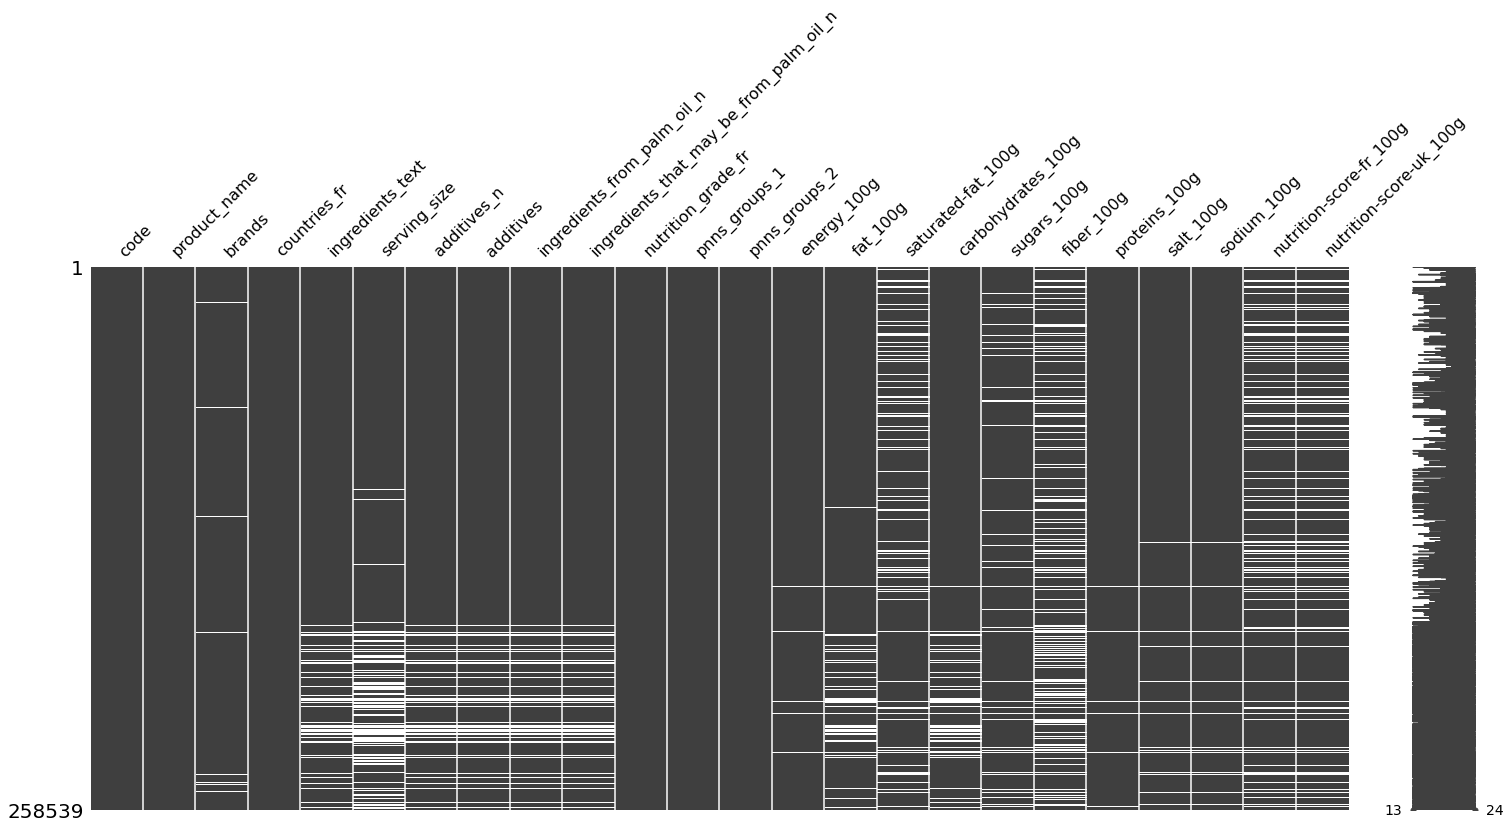

In [30]:
msno.matrix(products)

In [31]:
# Affichage du nombre de valeur unique par colonne
products.nunique()

code                                       258539
product_name                               186821
brands                                      46394
countries_fr                                  547
ingredients_text                           193223
serving_size                                25245
additives_n                                    31
additives                                  184850
ingredients_from_palm_oil_n                     3
ingredients_that_may_be_from_palm_oil_n         7
nutrition_grade_fr                              6
pnns_groups_1                                  14
pnns_groups_2                                  42
energy_100g                                  3943
fat_100g                                     3362
saturated-fat_100g                           2193
carbohydrates_100g                           5405
sugars_100g                                  4061
fiber_100g                                   1011
proteins_100g                                2483


In [32]:
# Valeur unique sur la variable ingredients_from_palm_oil_n
products.ingredients_from_palm_oil_n.unique()

array([ 0., nan,  1.,  2.])

In [33]:
# Valeur unique sur la variable ingredients_that_may_be_from_palm_oil_n
products.ingredients_that_may_be_from_palm_oil_n.unique()

array([ 0., nan,  1.,  2.,  5.,  3.,  4.,  6.])

In [34]:
# Valeur unique sur la variable nutrition_grade_fr
products.nutrition_grade_fr.unique()

array(['d', 'b', 'unknown', 'c', 'a', 'e'], dtype=object)

### Grade juste la france

In [35]:
# Liste de l'ensemble des pays
list(products.countries_fr.unique())

['États-Unis',
 'France,États-Unis',
 'Canada',
 'France',
 'Allemagne',
 'Royaume-Uni',
 'Espagne',
 'France,Royaume-Uni',
 'Belgique,France,Pays-Bas,Royaume-Uni',
 'Canada,États-Unis',
 'France,États-Unis,en:Etats-unis',
 'Royaume-Uni,États-Unis',
 'Belgique,France',
 'États-Unis,en:Australie',
 'Arabie saoudite',
 'Australie,États-Unis',
 'Australie',
 'France,Suisse',
 'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
 'États-Unis,en:Pays-bas',
 'Espagne,Royaume-Uni,en:Scotland',
 nan,
 'Mexique',
 'Suisse,États-Unis',
 'États-Unis,en:Deutschland',
 'Suisse',
 'France,Suisse,États-Unis',
 'Belgique,Suisse,États-Unis',
 'Danemark,États-Unis,en:Spanien',
 'États-Unis,en:Belgie,en:Nederland',
 'Belgique,Suisse',
 'France,Allemagne',
 'Malaisie,États-Unis',
 'Serbie',
 'Hong Kong',
 'Bahreïn,États-Unis',
 'France,Italie',
 'Cuba',
 'France,Royaume-Uni,États-Unis',
 'Italie,États-Unis',
 'Suisse,Royaume-Uni',
 'Espagne,États-Unis',
 'Panama,États-Unis',
 'Émirats arabes unis'

In [36]:
# France et France d'outre-mer
france_tot = products.loc[products["countries_fr"].str.contains(
    'France|Guadeloupe|Martinique|La Réunion|Mayotte|Guyane|Nouvelle-Calédonie|Polynésie française|Saint-Martin|Saint-Pierre-et-Miquelon|Wallis-et-Futuna|Saint-Barthélemy|Terres australes et antarctiques françaises|Clipperton', na=False)] 
france_tot

,code,product_name,brands,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,36252,Lion Peanut x2,Sunridge,"France,États-Unis","Milk chocolate coating (evaporated cane juice,...",40 g (0.25 cup),1.0,[ milk-chocolate-coating -> en:milk-chocolate...,0.0,0.0,e,unknown,unknown,1883.0,20.00,12.50,70.00,57.50,2.5,2.50,0.09652,0.038000,22.0,22.0
138,39529,Pack de 2 Twix,"Twix, Lundberg","France,États-Unis",NaN,48 g (0.25 cup),NaN,NaN,NaN,NaN,unknown,unknown,unknown,1481.0,4.17,NaN,77.08,NaN,6.2,6.25,NaN,NaN,NaN,NaN
190,10187319,Mini Confettis,Alice Délice,France,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,1753.0,NaN,0.80,NaN,87.70,0.9,0.60,0.01000,0.003937,14.0,14.0
191,10207260,Praliné Amande Et Noisette,Alice Délice,France,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,2406.0,NaN,2.90,NaN,50.30,3.9,9.50,0.00300,0.001181,14.0,14.0
226,40608754,"Pepsi, Nouveau goût !",Pepsi,France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",150ml,2.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,0.0,0.0,e,Beverages,Sweetened beverages,177.0,0.00,0.00,10.40,10.40,0.0,0.00,0.02540,0.010000,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,9782211109758,Verrine Cheescake Myrtille,Kayser,France,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,1084.0,NaN,12.00,NaN,10.50,0.0,8.70,0.29000,0.114173,16.0,16.0
320741,9782401029101,Fiche Brevet,Hatier,France,NaN,NaN,NaN,NaN,NaN,NaN,b,unknown,unknown,4.0,NaN,1.00,NaN,1.00,10.0,10.00,10.00000,3.937008,0.0,0.0
320751,9847548283004,Tartines craquantes bio au sarrasin,Le Pain des fleurs,France,NaN,NaN,NaN,NaN,NaN,NaN,a,Cereals and potatoes,Bread,1643.0,2.80,0.60,74.80,2.60,5.9,13.00,0.68000,0.267717,-4.0,-4.0
320757,9900000000233,Amandes,Biosic,France,NaN,NaN,NaN,NaN,NaN,NaN,b,unknown,unknown,2406.0,NaN,3.73,NaN,3.89,12.2,21.22,0.10000,0.039370,0.0,0.0


### Graphique nombre produit par nutri-score en france

In [37]:
# Vérification avant graphique avec les NAN dans le calcul
(france_tot.nutrition_grade_fr.value_counts(dropna=False))/(len(products))

d          0.065445
c          0.050793
e          0.045494
a          0.039379
b          0.035294
unknown    0.016442
Name: nutrition_grade_fr, dtype: float64

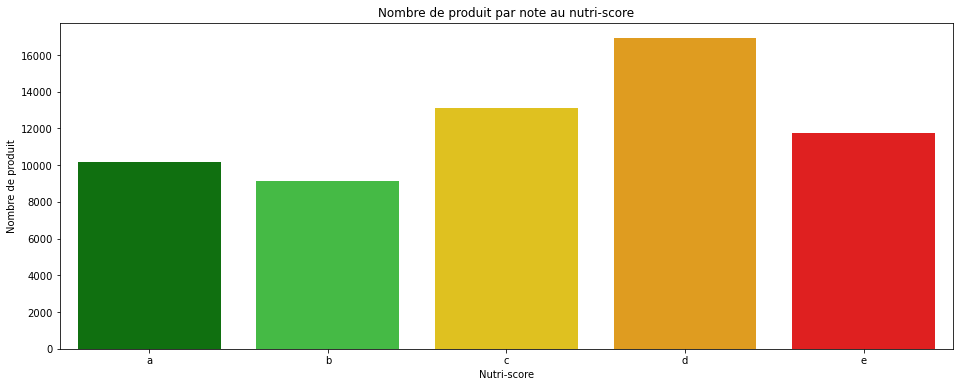

In [38]:
# Supprimer les unknown de nutrition_grade_fr
graph_products = france_tot[france_tot["nutrition_grade_fr"] != "unknown"]
# nutrition_grade_fr en ordre croissant 
order = ["a", "b", "c", "d", "e"]
# couleur
colors = ['green','limegreen','gold','orange','red']

# Graphique nombre de ligne par nutrition grade fr
plt.figure(figsize=(16, 6))
sns.countplot(x='nutrition_grade_fr', palette=colors, order=order, data=graph_products)
plt.title("Nombre de produit par note au nutri-score")
plt.ylabel("Nombre de produit")
plt.xlabel('Nutri-score')
plt.show()

In [39]:
# Vérification avant graphique sans compter les NAN dans le calcul
(france_tot.nutrition_grade_fr.value_counts())/(len(france_tot)-(france_tot.nutrition_grade_fr.isna().sum()))

d          0.258830
c          0.200884
e          0.179927
a          0.155742
b          0.139588
unknown    0.065029
Name: nutrition_grade_fr, dtype: float64

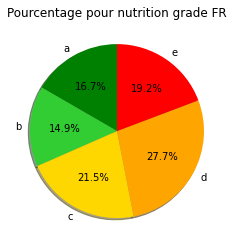

In [40]:
# Supprimer les unknown de nutrition_grade_fr
nutri_alpha = france_tot[france_tot["nutrition_grade_fr"] != "unknown"]

# Compte plus classement nutrition_grade_fr
nutri_alpha = nutri_alpha.nutrition_grade_fr.value_counts().sort_index()

# Graphique
plt.figure(figsize=(13,4)) 
plt.subplot(1,2,1)
labels = ['a','b','c','d','e']
colors = ['green','limegreen','gold','orange','red']
plt.title("Pourcentage pour nutrition grade FR")
plt.pie(nutri_alpha, shadow=True, labels=labels, colors=colors, autopct='%1.1f%%', startangle = 90) 
plt.show()

### Vérification des colonnes restantes

In [41]:
# Affichage du nombre de valeur unique par colonne
france_tot.nunique()

code                                       65371
product_name                               54515
brands                                     13915
countries_fr                                 275
ingredients_text                           41996
serving_size                                5654
additives_n                                   23
additives                                  39153
ingredients_from_palm_oil_n                    3
ingredients_that_may_be_from_palm_oil_n        6
nutrition_grade_fr                             6
pnns_groups_1                                 13
pnns_groups_2                                 40
energy_100g                                 3396
fat_100g                                    1186
saturated-fat_100g                          1209
carbohydrates_100g                          1425
sugars_100g                                 1481
fiber_100g                                   754
proteins_100g                               1118
salt_100g           

In [42]:
# Suppression de la variable countries_fr car plus d'utilité 
france_tot = france_tot.drop(columns=["countries_fr"])

In [43]:
# Vérification du taux de valeur manquante entre Nutriscore
nutri = ["nutrition-score-fr_100g","nutrition-score-uk_100g","nutrition_grade_fr"]
france_tot[nutri].isna().sum()/len(france_tot)*100

nutrition-score-fr_100g    6.502884
nutrition-score-uk_100g    6.502884
nutrition_grade_fr         0.000000
dtype: float64

In [44]:
# Suppression de la variable "nutrition-score-uk_100g" car plus d'utilité 
france_tot = france_tot.drop(columns=["nutrition-score-uk_100g"])

### Histogramme et Boxplot des variables pertinentes

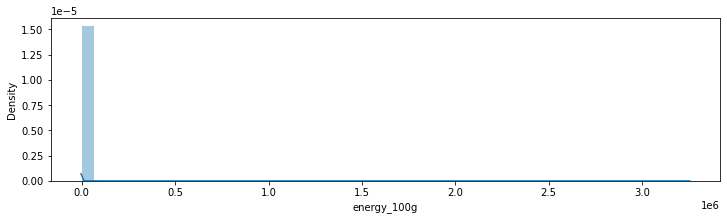

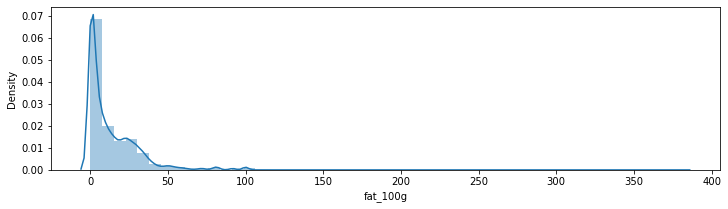

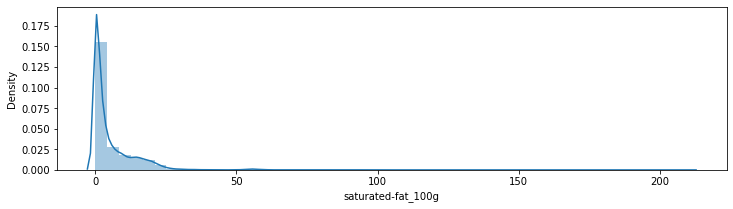

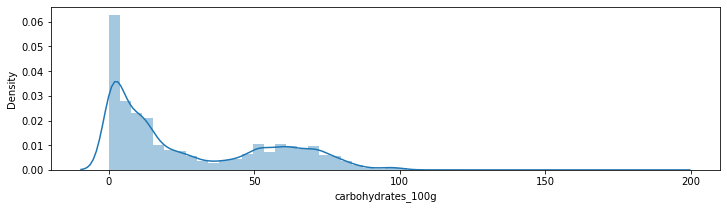

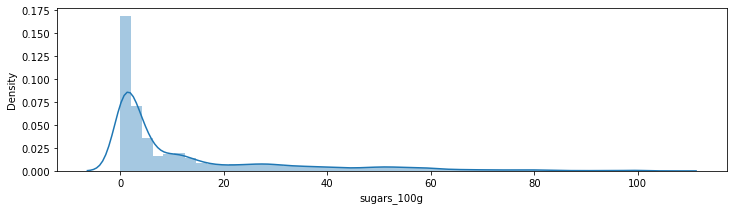

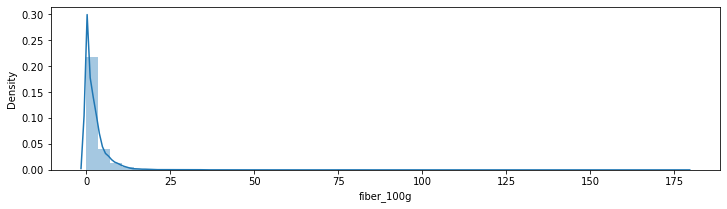

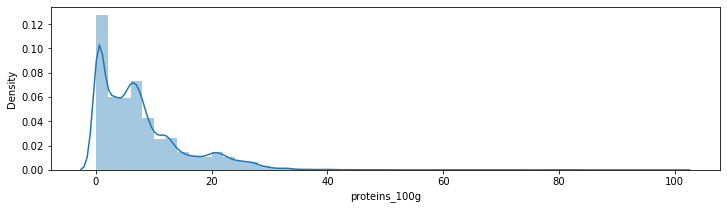

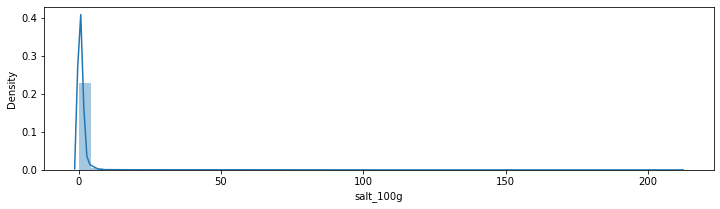

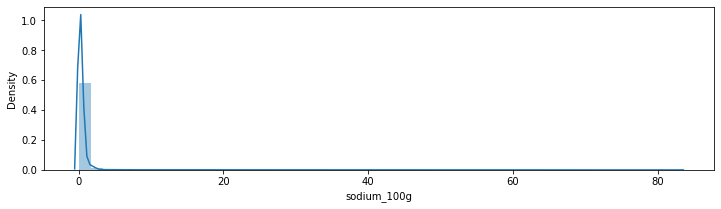

In [45]:
# Liste des colonnes pour histogramme et boxplot
list_column = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
               'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
# Histogramme
for column in list_column:
    plt.figure(figsize=(12, 3))
    sns.distplot(france_tot[column])
    plt.show()

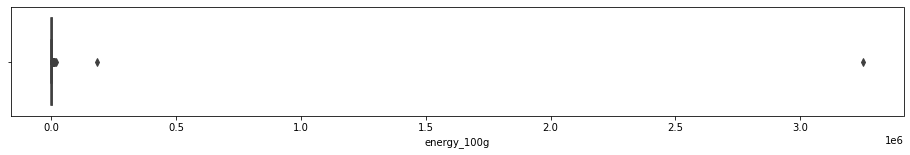

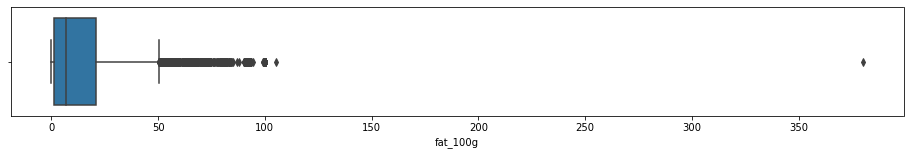

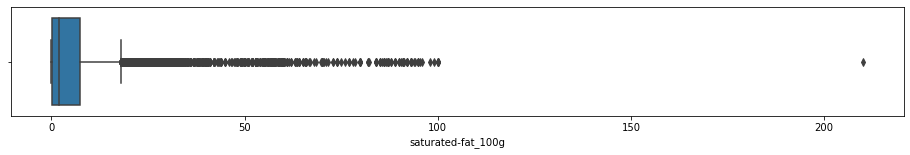

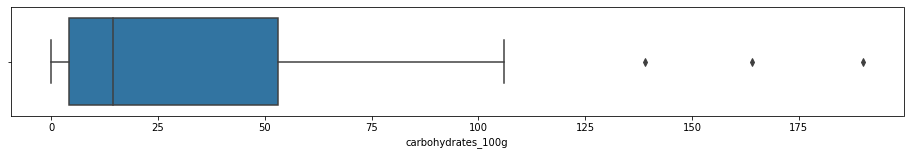

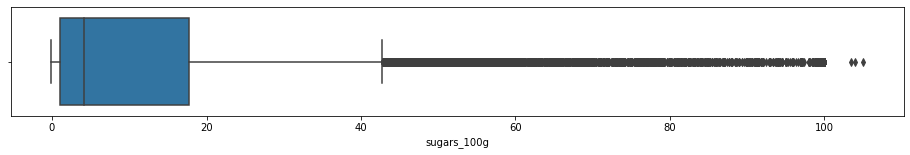

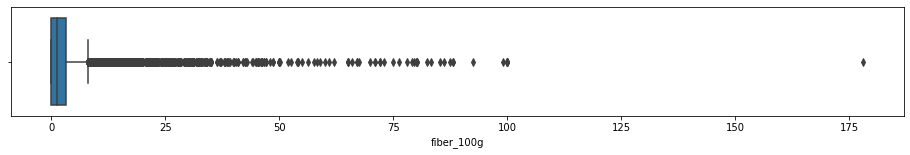

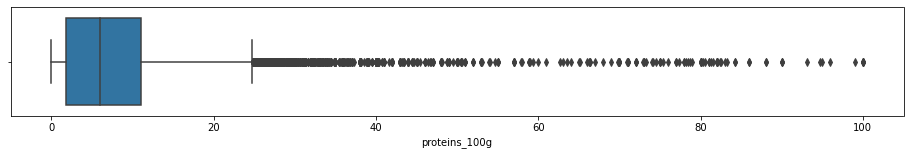

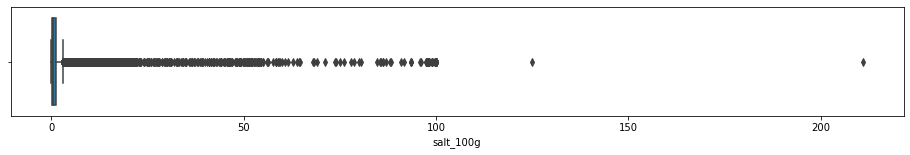

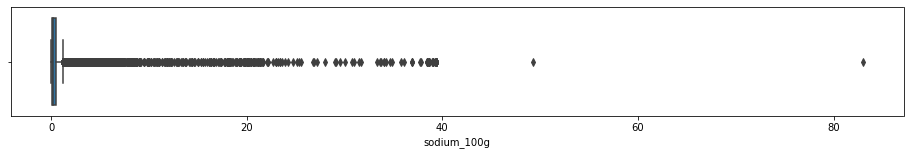

In [46]:
# Boxplot
for column in list_column:
    plt.figure(figsize=(16,2))
    sns.boxplot(x=france_tot[column])
    plt.show()

### Valeurs aberrantes et suppression

In [47]:
# Affichage des min de chaque variable
france_tot.describe().loc["min"]

additives_n                                 0.0
ingredients_from_palm_oil_n                 0.0
ingredients_that_may_be_from_palm_oil_n     0.0
energy_100g                                 0.0
fat_100g                                    0.0
saturated-fat_100g                          0.0
carbohydrates_100g                          0.0
sugars_100g                                -0.1
fiber_100g                                  0.0
proteins_100g                               0.0
salt_100g                                   0.0
sodium_100g                                 0.0
nutrition-score-fr_100g                   -15.0
Name: min, dtype: float64

In [48]:
# Valeur aberrante sur energy_100g
france_tot.loc[france_tot["energy_100g"] > 100000,:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
212928,3257983143096,Pois cassés,Cora,Pois cassés.,80 g,0.0,[ pois-casses -> fr:pois-casses ] [ pois ->...,0.0,0.0,b,unknown,unknown,3251373.0,1.2,0.2,48.2,2.5,15.4,22.7,0.01,0.003937,0.0
249101,3661405001053,"Légume Noisettes Carottes, 500 Grammes, Marque...",Iglo,NaN,150 g,NaN,NaN,NaN,NaN,d,unknown,unknown,182764.0,9.0,2.0,21.0,4.5,3.5,4.0,1.19,0.468504,12.0


In [49]:
# Valeur aberrante sur fat_100g
france_tot.loc[france_tot["fat_100g"] > 100,:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
245311,3596710288755,mini choux goût fromage de chèvre - poivre,Auchan,matières grasses végétales de palme et de palm...,15 g,7.0,[ matieres-grasses-vegetales-de-palme-et-de-p...,1.0,0.0,e,Salty snacks,Appetizers,18700.0,380.0,210.0,190.0,22.7,0.0,0.0,9.33,3.670000,35.0
305054,8032942610032,Graine de couscous moyen,La méditerranéa,NaN,NaN,NaN,NaN,NaN,NaN,a,Cereals and potatoes,Cereals,1482.0,105.0,0.3,70.0,2.5,NaN,12.0,0.01,0.003937,-1.0


In [50]:
france_tot.loc[france_tot["saturated-fat_100g"] > 100,:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
245311,3596710288755,mini choux goût fromage de chèvre - poivre,Auchan,matières grasses végétales de palme et de palm...,15 g,7.0,[ matieres-grasses-vegetales-de-palme-et-de-p...,1.0,0.0,e,Salty snacks,Appetizers,18700.0,380.0,210.0,190.0,22.7,0.0,0.0,9.33,3.67,35.0


In [51]:
france_tot.loc[france_tot["carbohydrates_100g"] > 100,:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
155609,838619000254,Beurre d'érable,NaN,NaN,33 g,NaN,NaN,NaN,NaN,unknown,unknown,unknown,1390.0,0.0,0.0,164.0,72.7,NaN,0.0,NaN,NaN,NaN
202571,3229820787909,Sirop d'Agave brun bio,Bjorg,100% sirop d'agave.,100 ml,0.0,[ 100-sirop-d-agave -> fr:100-sirop-d-agave ...,0.0,0.0,d,unknown,unknown,1760.0,0.0,0.0,104.0,104.0,0.0,0.0,0.14000,0.05510,15.0
234726,3473710080032,Palets pur beurre,Georges Blanc,"Farine de _blé_, beurre frais de baratte (_lai...",30 g,2.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,0.0,0.0,e,Sugary snacks,Biscuits and cakes,3925.0,52.0,35.5,106.0,52.0,3.0,10.0,1.30048,0.51200,31.0
239347,3560070740338,Sirop d'agave,Carrefour Bio,Sirop d'agave concentré issu de l'agriculture ...,20 ml,0.0,[ sirop-d-agave-concentre-issu-de-l-agricultu...,0.0,0.0,unknown,Sugary snacks,Sweets,1785.0,NaN,NaN,105.0,105.0,NaN,NaN,NaN,NaN,NaN
245311,3596710288755,mini choux goût fromage de chèvre - poivre,Auchan,matières grasses végétales de palme et de palm...,15 g,7.0,[ matieres-grasses-vegetales-de-palme-et-de-p...,1.0,0.0,e,Salty snacks,Appetizers,18700.0,380.0,210.0,190.0,22.7,0.0,0.0,9.33000,3.67000,35.0
260599,4016249015732,Sirop d agave pur,Allos,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,1760.0,1.0,0.1,103.5,103.5,NaN,1.0,0.10000,0.03937,15.0
317635,8935000901649,Banane sèche,Vinawang,banane,10 g,0.0,[ banane -> fr:banane ],0.0,0.0,c,Fruits and vegetables,Dried fruits,1259.0,0.0,0.0,139.0,41.5,0.0,5.0,0.00000,0.00000,4.0


In [52]:
france_tot.loc[france_tot["sugars_100g"] > 100,:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
202571,3229820787909,Sirop d'Agave brun bio,Bjorg,100% sirop d'agave.,100 ml,0.0,[ 100-sirop-d-agave -> fr:100-sirop-d-agave ...,0.0,0.0,d,unknown,unknown,1760.0,0.0,0.0,104.0,104.0,0.0,0.0,0.14,0.05510,15.0
239347,3560070740338,Sirop d'agave,Carrefour Bio,Sirop d'agave concentré issu de l'agriculture ...,20 ml,0.0,[ sirop-d-agave-concentre-issu-de-l-agricultu...,0.0,0.0,unknown,Sugary snacks,Sweets,1785.0,NaN,NaN,105.0,105.0,NaN,NaN,NaN,NaN,NaN
260599,4016249015732,Sirop d agave pur,Allos,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,1760.0,1.0,0.1,103.5,103.5,NaN,1.0,0.10,0.03937,15.0


In [53]:
france_tot.loc[france_tot["fiber_100g"] > 100,:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
298897,7622210988768,Milka Schmunzelhase Alpenmilch 175G,Mondelez,"entnalten. (Oingrealents: e , vuul écrémé, pât...",NaN,1.0,[ entnalten -> fr:entnalten ] [ oingrealent...,0.0,0.0,e,unknown,unknown,2218.0,29.0,18.0,59.0,58.0,178.0,6.3,0.37,0.145669,22.0


In [54]:
france_tot.loc[france_tot["proteins_100g"] > 100,:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g


In [55]:
france_tot.loc[france_tot["salt_100g"] > 100,:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
232239,3423720002432,Keeny Bio,Bio Soleil,"Farine de _blé_ T65*, _Œufs_ entiers*, sucre d...",27 g,4.0,[ farine-de-ble-t65 -> fr:farine-de-ble-t65 ...,0.0,0.0,e,Sugary snacks,Biscuits and cakes,1720.0,23.0,3.33,47.8,26.7,0.741,6.3,211.0,83.000000,22.0
233372,3445850070259,Sel de Guérande Label Rouge,Le guerandais,Sel marin moulu.,NaN,0.0,[ sel-marin-moulu -> fr:sel-marin-moulu ] [...,0.0,0.0,c,unknown,unknown,0.0,0.0,0.00,0.0,0.0,0.000,0.0,125.0,49.212598,10.0


In [56]:
france_tot.loc[france_tot["sodium_100g"] > 40,:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
232239,3423720002432,Keeny Bio,Bio Soleil,"Farine de _blé_ T65*, _Œufs_ entiers*, sucre d...",27 g,4.0,[ farine-de-ble-t65 -> fr:farine-de-ble-t65 ...,0.0,0.0,e,Sugary snacks,Biscuits and cakes,1720.0,23.0,3.33,47.8,26.7,0.741,6.3,211.0,83.000000,22.0
233372,3445850070259,Sel de Guérande Label Rouge,Le guerandais,Sel marin moulu.,NaN,0.0,[ sel-marin-moulu -> fr:sel-marin-moulu ] [...,0.0,0.0,c,unknown,unknown,0.0,0.0,0.00,0.0,0.0,0.000,0.0,125.0,49.212598,10.0


In [57]:
france_tot.loc[france_tot["nutrition-score-fr_100g"] > 38,:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
177065,20009373,Cappuccino allégé en sucre*,Bellarom,"poudre de _lactosérum_, maltodextrine, 16% caf...",15 g,1.0,[ poudre-de-lactoserum -> fr:poudre-de-lactos...,0.0,0.0,e,Beverages,Non-sugared beverages,1603.0,14.6,13.4,51.3,34.9,NaN,9.5,3.25,1.279528,40.0


In [58]:
# Vérif avant suppression
france_tot.shape # (65371, 22)

(65371, 22)

In [59]:
# Traitement d'enegie a part # Huile 3700kj
france_tot = france_tot.loc[(pd.to_numeric(france_tot["energy_100g"], errors='coerce') <= 3700) 
                            & ~(pd.to_numeric(france_tot["energy_100g"], errors='coerce') < 0) 
                            | france_tot["energy_100g"].isnull(),:]

# Suppression des inf à 0 et sup à 100
list_column = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
               'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

for column in list_column:
    france_tot = france_tot.loc[(pd.to_numeric(france_tot[column], errors='coerce') <= 100)  
                                | france_tot[column].isnull(),:]
    france_tot = france_tot.loc[~(pd.to_numeric(france_tot[column], errors='coerce') < 0),:]
# Vérif après suppression
france_tot.shape #(65356, 22)

(65107, 22)

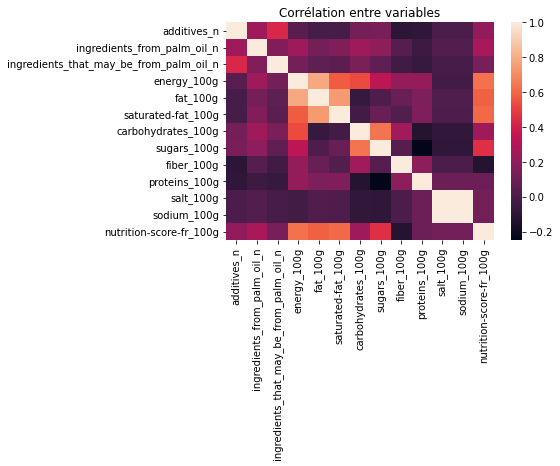

In [60]:
# Corrélation entre variables
sns.heatmap(france_tot.corr())
plt.title("Corrélation entre variables")
plt.show()

In [61]:
# Suppression des variables ayant trop de corrélation
france_tot = france_tot.drop(columns=['saturated-fat_100g', 'carbohydrates_100g','sodium_100g'])

### Graphique 


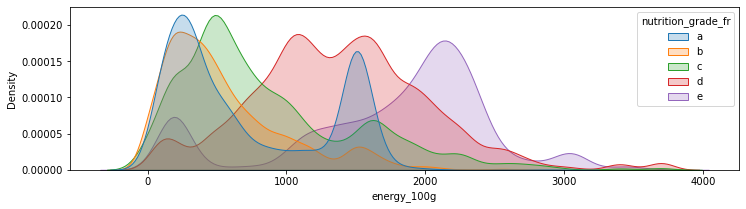

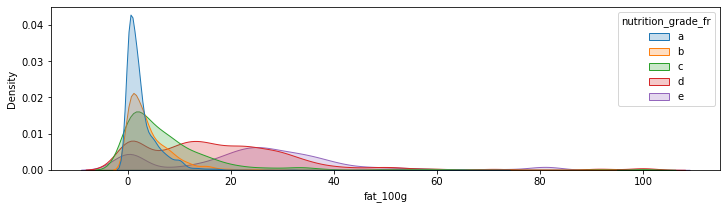

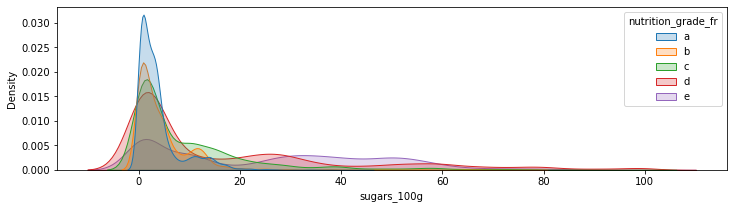

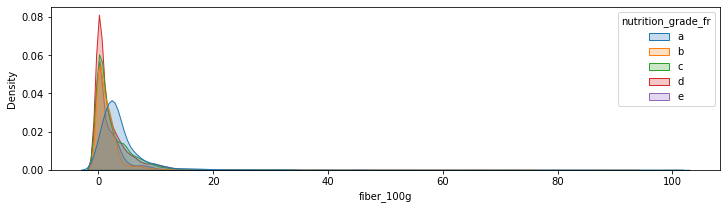

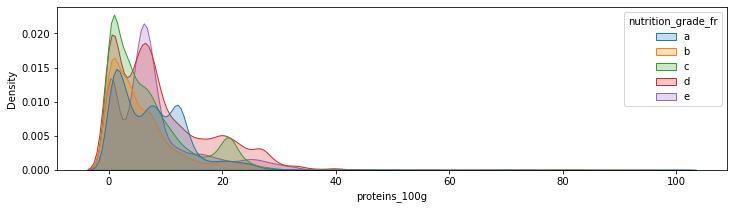

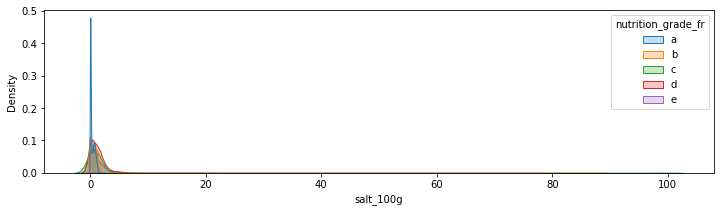

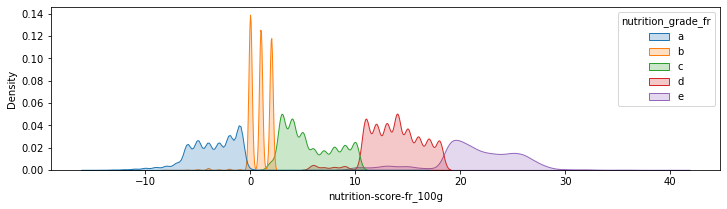

In [62]:
# Visuel des 100g en fonction du nutrigrade

# Recherche des variables *100g
france_tot_100g = list(france_tot.columns[france_tot.columns.str.contains("100g")])

# Supprimer les unknown de nutrition_grade_fr
graph_france_tot_100g = france_tot[france_tot["nutrition_grade_fr"] != "unknown"]

# Trie par ordre croissant sur nutrition_grade_fr
graph_france_tot_100g = graph_france_tot_100g.sort_values(by="nutrition_grade_fr", ascending=True)

# Graphique
for x in france_tot_100g:
    plt.figure(figsize=(12, 3))
    sns.kdeplot(data=graph_france_tot_100g, x=x, hue='nutrition_grade_fr', shade=True)
    plt.show()

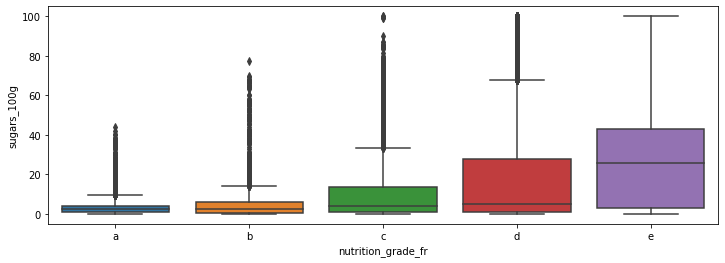

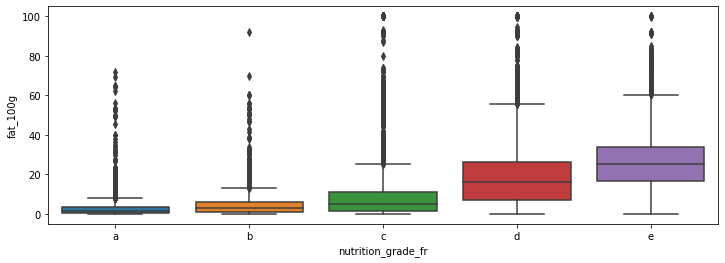

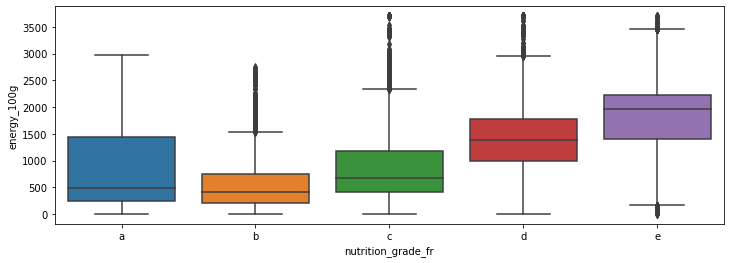

In [63]:
# Influence du nutrigrade sur le sucre / fat / energy
sug_fat_ener = ['sugars_100g', 'fat_100g', 'energy_100g']
order = ['a', 'b', 'c', 'd', 'e']

for variable in sug_fat_ener:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x='nutrition_grade_fr', y=variable, data=graph_france_tot_100g, order=order)
    plt.ylabel(variable)
    plt.show()

### Missingno

<AxesSubplot:>

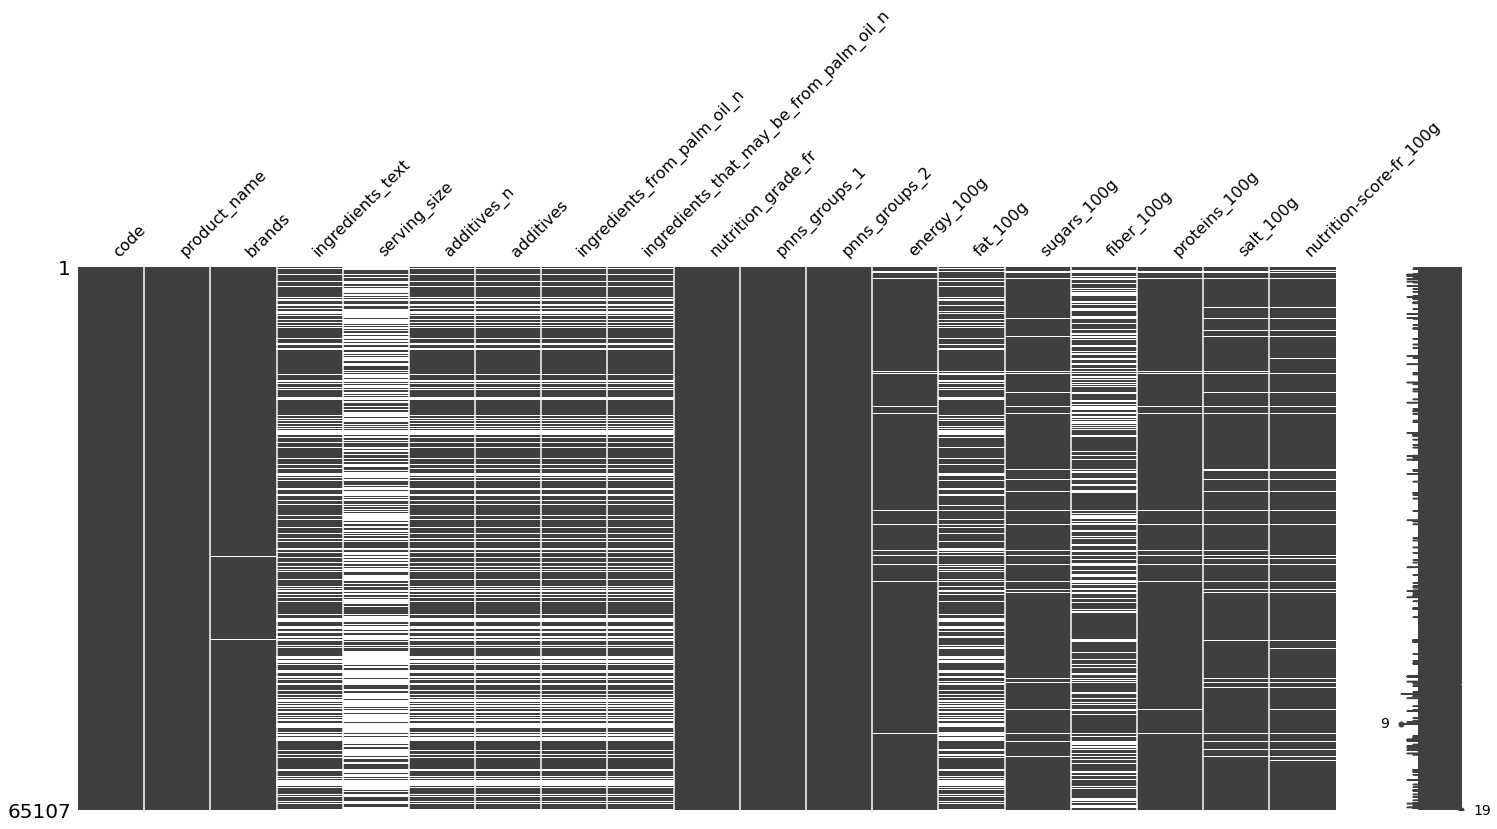

In [64]:
msno.matrix(france_tot)

<AxesSubplot:>

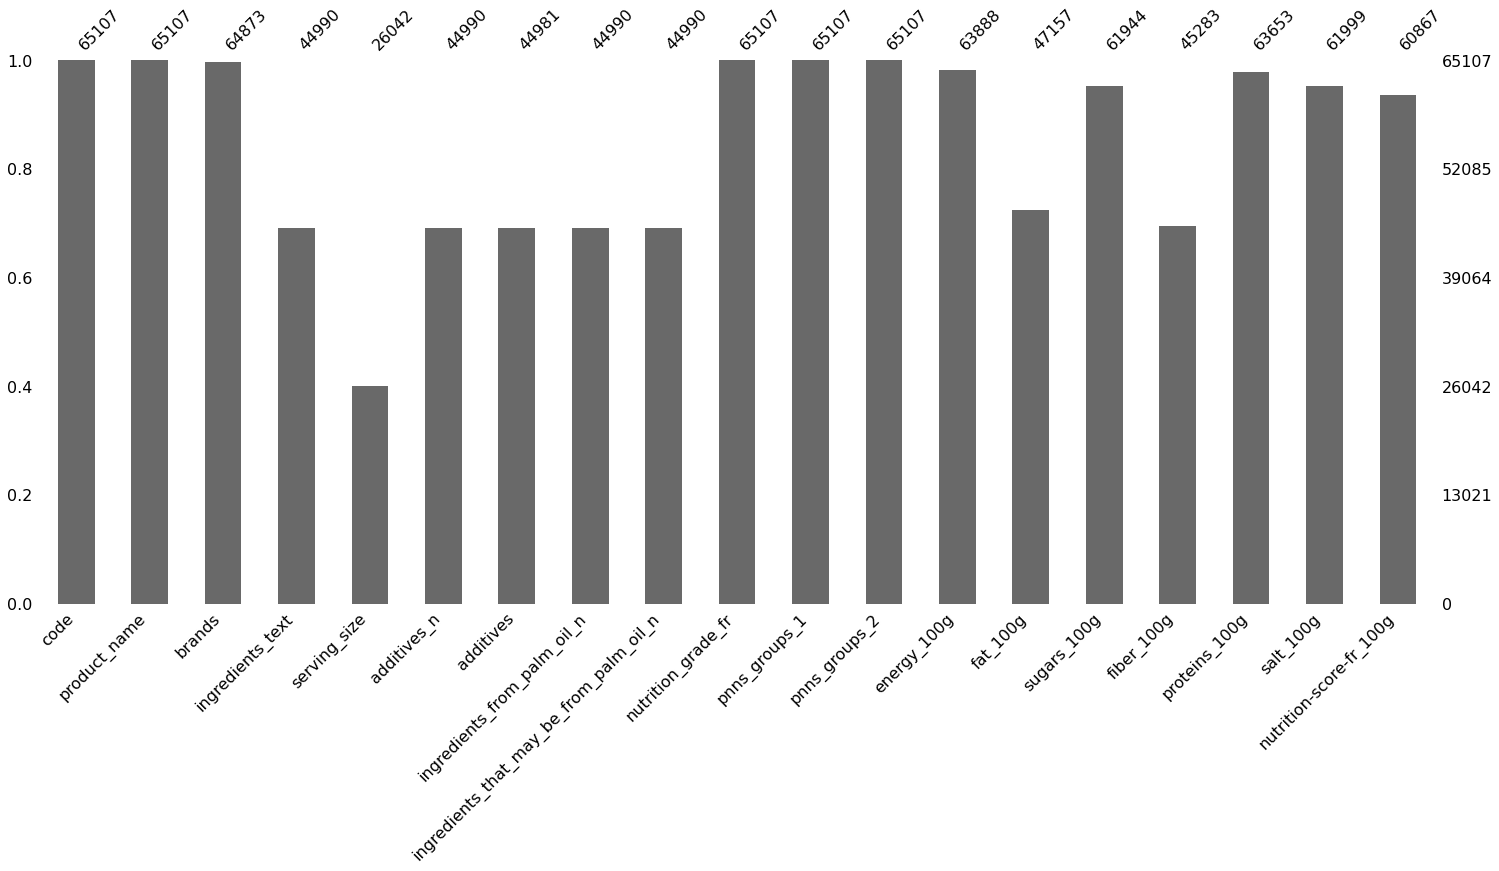

In [65]:
# Barplot
msno.bar(france_tot)

<AxesSubplot:>

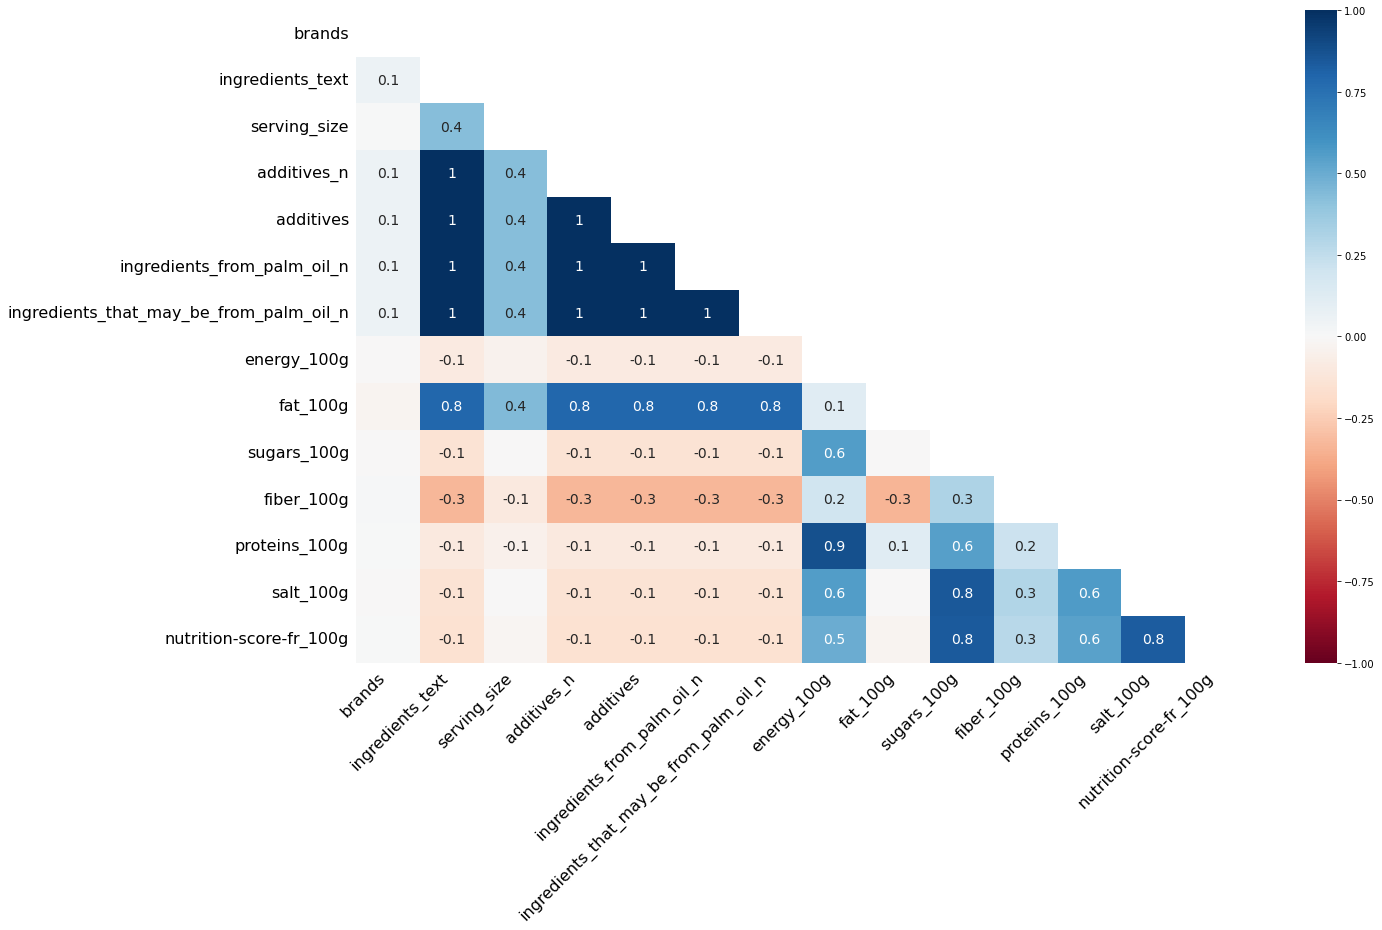

In [66]:
msno.heatmap(france_tot)

<AxesSubplot:>

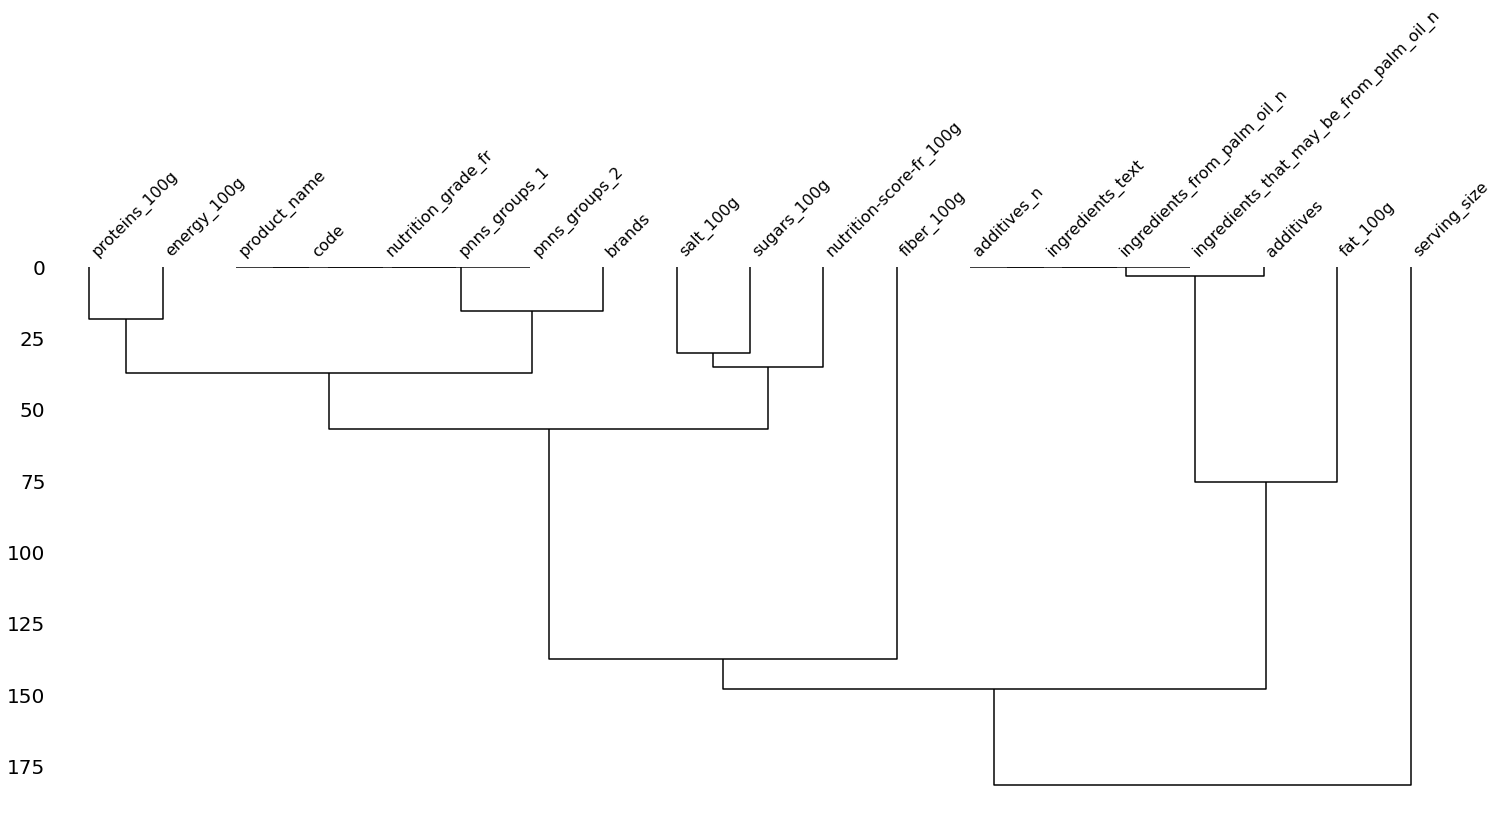

In [67]:
msno.dendrogram(france_tot)

In [68]:
france_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65107 entries, 106 to 320763
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     65107 non-null  object 
 1   product_name                             65107 non-null  object 
 2   brands                                   64873 non-null  object 
 3   ingredients_text                         44990 non-null  object 
 4   serving_size                             26042 non-null  object 
 5   additives_n                              44990 non-null  float64
 6   additives                                44981 non-null  object 
 7   ingredients_from_palm_oil_n              44990 non-null  float64
 8   ingredients_that_may_be_from_palm_oil_n  44990 non-null  float64
 9   nutrition_grade_fr                       65107 non-null  object 
 10  pnns_groups_1                            65

In [69]:
# Nombre de Null par variable
france_tot.isna().sum()

code                                           0
product_name                                   0
brands                                       234
ingredients_text                           20117
serving_size                               39065
additives_n                                20117
additives                                  20126
ingredients_from_palm_oil_n                20117
ingredients_that_may_be_from_palm_oil_n    20117
nutrition_grade_fr                             0
pnns_groups_1                                  0
pnns_groups_2                                  0
energy_100g                                 1219
fat_100g                                   17950
sugars_100g                                 3163
fiber_100g                                 19824
proteins_100g                               1454
salt_100g                                   3108
nutrition-score-fr_100g                     4240
dtype: int64

### Methode 1: InterativeImputer

In [70]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [71]:
france_tot_imputer = france_tot.copy()

In [72]:
france_tot_imputer1 = france_tot_imputer[["energy_100g","fat_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g"]]

In [73]:
iterativeimputer = IterativeImputer(min_value = 0, max_value = 100)

# a_revoir: faire un imputer de energy a par avec un max_value adapter

In [74]:
france_tot_imputer1.iloc[:,:] = iterativeimputer.fit_transform(france_tot_imputer1)

In [75]:
# Vérification 
france_tot_imputer1.isna().sum()

energy_100g      0
fat_100g         0
sugars_100g      0
fiber_100g       0
proteins_100g    0
salt_100g        0
dtype: int64

### Methode 2: Imputation par la médiane 

In [76]:
france_tot_imputer2 = france_tot.copy()

In [77]:
france_tot_imputer2.isna().sum()

code                                           0
product_name                                   0
brands                                       234
ingredients_text                           20117
serving_size                               39065
additives_n                                20117
additives                                  20126
ingredients_from_palm_oil_n                20117
ingredients_that_may_be_from_palm_oil_n    20117
nutrition_grade_fr                             0
pnns_groups_1                                  0
pnns_groups_2                                  0
energy_100g                                 1219
fat_100g                                   17950
sugars_100g                                 3163
fiber_100g                                 19824
proteins_100g                               1454
salt_100g                                   3108
nutrition-score-fr_100g                     4240
dtype: int64

In [78]:
# Imputation par la médiane
list_column = ['energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']

for column in list_column:
    imp_median = france_tot_imputer2[column].median()
    france_tot_imputer2[column] = france_tot_imputer2[column].fillna(imp_median)

In [79]:
france_tot_imputer2.isna().sum()

code                                           0
product_name                                   0
brands                                       234
ingredients_text                           20117
serving_size                               39065
additives_n                                20117
additives                                  20126
ingredients_from_palm_oil_n                20117
ingredients_that_may_be_from_palm_oil_n    20117
nutrition_grade_fr                             0
pnns_groups_1                                  0
pnns_groups_2                                  0
energy_100g                                    0
fat_100g                                       0
sugars_100g                                    0
fiber_100g                                     0
proteins_100g                                  0
salt_100g                                      0
nutrition-score-fr_100g                     4240
dtype: int64

### Graphique apres imputation

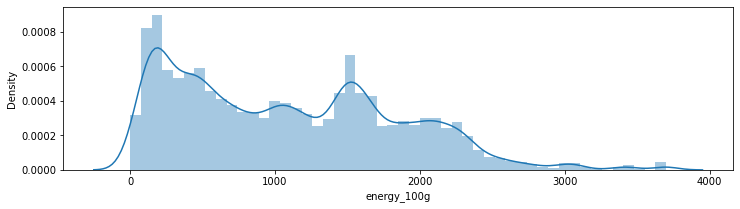

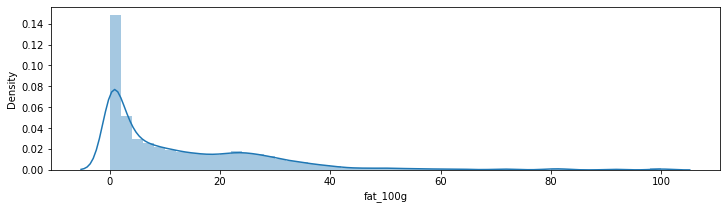

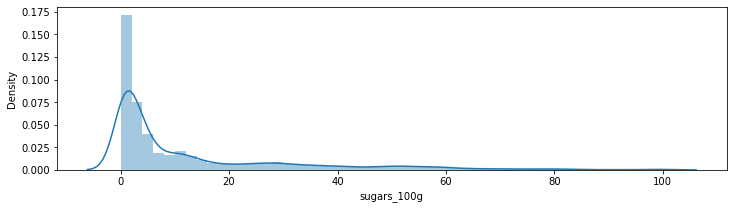

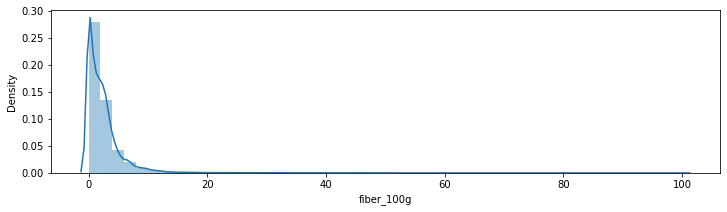

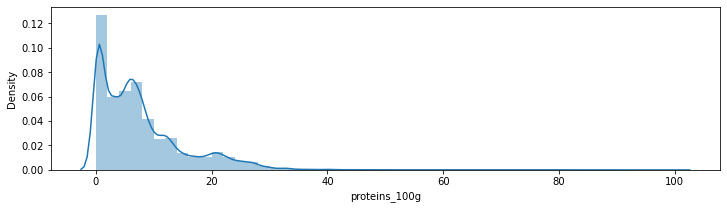

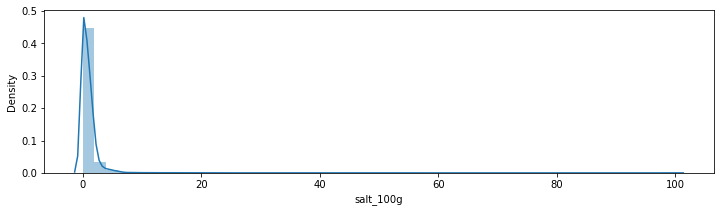

In [80]:
list_column = ['energy_100g', 'fat_100g', 'sugars_100g',
               'fiber_100g', 'proteins_100g', 'salt_100g']

# Histogramme apres imputation
for column in list_column:
    plt.figure(figsize=(12, 3))
    sns.distplot(france_tot_imputer1[column])
    plt.show()

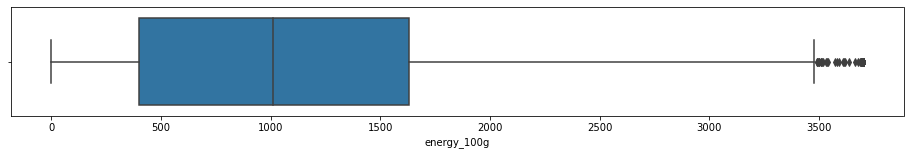

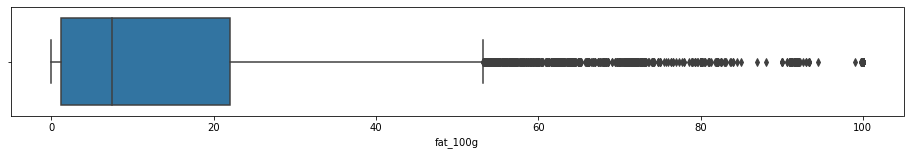

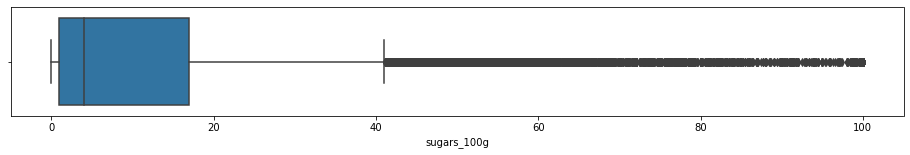

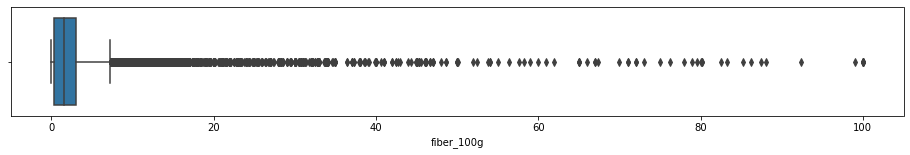

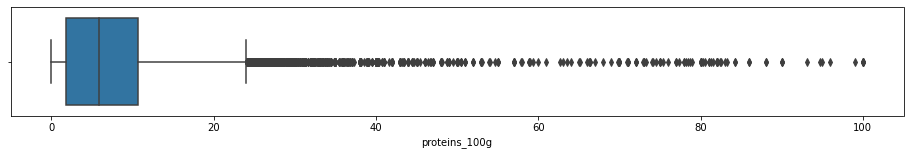

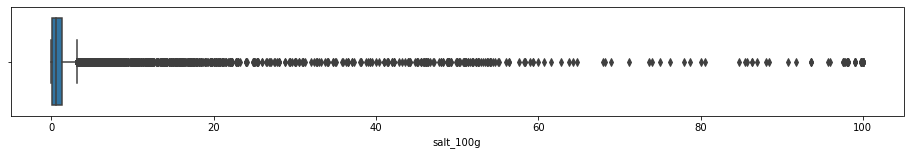

In [81]:
# Boxplot apres imputation
for column in list_column:
    plt.figure(figsize=(16,2))
    sns.boxplot(x=france_tot_imputer1[column])
    plt.show()

### Produit catégorie snack bien noté

In [82]:
# Somme des null par variable
france_tot.isna().sum()

code                                           0
product_name                                   0
brands                                       234
ingredients_text                           20117
serving_size                               39065
additives_n                                20117
additives                                  20126
ingredients_from_palm_oil_n                20117
ingredients_that_may_be_from_palm_oil_n    20117
nutrition_grade_fr                             0
pnns_groups_1                                  0
pnns_groups_2                                  0
energy_100g                                 1219
fat_100g                                   17950
sugars_100g                                 3163
fiber_100g                                 19824
proteins_100g                               1454
salt_100g                                   3108
nutrition-score-fr_100g                     4240
dtype: int64

In [83]:
france_tot.pnns_groups_1.value_counts()

unknown                    21930
Sugary snacks               7749
Milk and dairy products     5791
Cereals and potatoes        5450
Composite foods             5407
Fish Meat Eggs              5046
Beverages                   5007
Fat and sauces              2999
Fruits and vegetables       2991
Salty snacks                1889
fruits-and-vegetables        458
sugary-snacks                389
cereals-and-potatoes           1
Name: pnns_groups_1, dtype: int64

### Salé

In [84]:
# DataFrame du groupe Salty snacks
snack_salt = france_tot.loc[france_tot["pnns_groups_1"] == "Salty snacks"]
snack_salt

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
10375,120623,"Sweet Potato, Parsnip and Beetroot Hand Cooked...","Marks & Spencer,Marks and Spencer",Mélange de légumes en proportion variable (66%...,40 g,0.0,[ melange-de-legumes-en-proportion-variable -...,0.0,0.0,d,Salty snacks,Appetizers,2184.0,35.3,23.6,9.9,4.8,1.00000,13.0
11282,14100099680,Goldfish Cheddar,Pepperidge Farm,"Farine de _blé_ enrichie (farine, niacine, fer...",25 g,11.0,[ farine-de-ble-enrichie -> fr:farine-de-ble-...,0.0,0.0,d,Salty snacks,Appetizers,1958.0,18.1,1.4,2.5,11.6,1.90000,13.0
11300,14113230025,Almonds Amandes grillées salées,Wonderful,"_amandes_ (99%), sel (1%)",NaN,0.0,[ amandes -> fr:amandes ] [ 99 -> fr:99 ] ...,0.0,0.0,d,Salty snacks,Nuts,2549.0,52.1,4.9,NaN,21.1,0.80000,14.0
11303,14113230117,Amandes Grillées Salées,Wonderful,"_Amandes_ (98%), sel (2%).",NaN,0.0,[ amandes -> fr:amandes ] [ 98 -> fr:98 ] ...,0.0,0.0,d,Salty snacks,Nuts,2577.0,52.1,4.9,NaN,21.0,0.80000,14.0
11327,14113911368,Pistachios Salées,Wonderful,"_Pistaches_ (98,5%), sel (1,5%).",NaN,0.0,[ pistaches -> fr:pistaches ] [ 98 -> fr:98...,0.0,0.0,d,Salty snacks,Nuts,2444.0,46.0,7.8,NaN,21.4,1.30000,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318003,9002859031328,Bacon Snack,Snackline,"Farine de _blé_ (65%), huile de palme, sel (&l...",NaN,7.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,1.0,0.0,e,Salty snacks,Appetizers,2107.0,26.6,3.5,NaN,8.0,2.90000,26.0
318071,9003600581444,Connaisseurs Amandes,"Lindt,Lindt & Sprüngli","amandes (33%), sucre, pâte de cacao, beurre de...",NaN,3.0,[ amandes -> fr:amandes ] [ 33 -> fr:33 ] ...,0.0,0.0,e,Salty snacks,Nuts,2353.0,43.0,30.0,NaN,9.1,0.04000,23.0
318507,9107230000020,Chips Nature,Lay's,"Pommes de terres, huile de tournesol 34 %, sel.",45g,0.0,[ pommes-de-terres -> fr:pommes-de-terres ] ...,0.0,0.0,c,Salty snacks,Appetizers,2220.0,33.0,0.3,4.0,6.5,1.30048,9.0
318509,9108930003830,Chips à l'ancienne Nature,Lay's,"Pommes de terre, huile de tournesol (39 %), sel.",NaN,0.0,[ pommes-de-terre -> fr:pommes-de-terre ] [...,0.0,0.0,c,Salty snacks,Appetizers,2490.0,39.0,0.4,4.0,6.0,1.34620,10.0


In [85]:
# Nombre de row par nutrition_grade_fr sur snack salt
snack_salt["nutrition_grade_fr"].value_counts()

d          926
c          490
e          302
unknown     66
b           64
a           41
Name: nutrition_grade_fr, dtype: int64

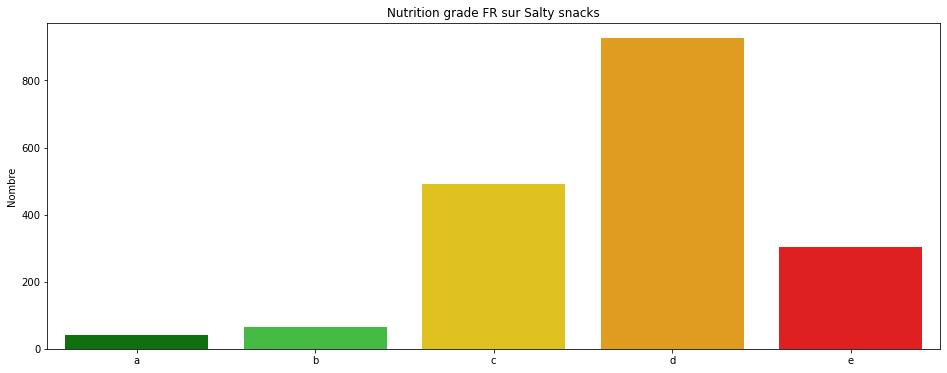

In [86]:
# Graphique Salty snacks nutrition grade fr
order = ['a', 'b', 'c', 'd', 'e']
colors = ['green','limegreen','gold','orange','red','grey']

plt.figure(figsize=(16, 6))
sns.countplot(x='nutrition_grade_fr', data=snack_salt, order=order, palette=colors)
plt.title("Nutrition grade FR sur Salty snacks")
plt.ylabel("Nombre")
plt.xlabel('')
plt.show()

### Sucré

In [87]:
# DataFrame du groupe Sugary snacks
snack_sugary = france_tot.loc[france_tot["pnns_groups_1"] == "Sugary snacks"]
snack_sugary

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
242,10,Madeleines nature,Bijou,"Farine de _blé_, huile de colza, sucre, _oeufs...",17.6g,5.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,0.0,1.0,d,Sugary snacks,Biscuits and cakes,1900.0,23.0,26.00,1.500,6.000,0.66000,12.0
279,30,Cakes Raisins,Bijou,"Farine de _blé_, _œufs_ frais, huile de colza,...",30 g,5.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,0.0,1.0,d,Sugary snacks,Biscuits and cakes,1768.0,19.0,28.00,1.800,5.800,0.65000,13.0
283,31,Cakes aux Fruits,Bijou,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...",30 g,11.0,[ fruits-37-4 -> fr:fruits-37-4 ] [ fruits-...,0.0,1.0,d,Sugary snacks,Biscuits and cakes,1670.0,15.0,34.00,1.500,4.900,0.60000,12.0
299,50,Financiers aux Amandes,Bijou,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_...",22 g,3.0,[ sucre -> fr:sucre ] [ blanc-d-oeufs-frais...,0.0,0.0,e,Sugary snacks,Biscuits and cakes,1868.0,23.0,39.00,1.700,8.000,0.55000,22.0
301,51,Fondants Citron,Bijou,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_...",22 g,8.0,[ sucre -> fr:sucre ] [ blanc-d-oeufs-frais...,0.0,0.0,e,Sugary snacks,Biscuits and cakes,1896.0,24.0,37.00,2.500,8.100,0.78000,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319428,9310072000381,MONTE,ARNOTT'S,NaN,NaN,NaN,NaN,NaN,NaN,b,Sugary snacks,Biscuits and cakes,261.0,3.1,4.50,NaN,0.600,0.08382,1.0
319430,9310072000480,Sao,Arnott's,"Farine de _blé_, huile végétale, sel, levure d...","25,8 g (3 biscuits)",2.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,0.0,1.0,d,Sugary snacks,Biscuits and cakes,1900.0,15.1,1.10,3.700,10.000,1.77800,14.0
320246,9346758000246,Eighty,Pana Cacao,"Cacao 80% (beurre de cacao, poudre de cacao), ...",15 g,0.0,[ cacao-80 -> fr:cacao-80 ] [ cacao -> fr:c...,0.0,0.0,e,Sugary snacks,Chocolate products,2322.0,46.6,21.70,NaN,7.100,0.18000,20.0
320681,96068779,Spearmint sans sucres,Fisherman's Friend,"Édulcorants : sorbitol, sucralose, acésulfame-...",NaN,4.0,[ edulcorants -> fr:edulcorants ] [ sorbito...,0.0,1.0,c,Sugary snacks,Sweets,1017.0,1.3,0.12,0.005,0.040,0.00500,4.0


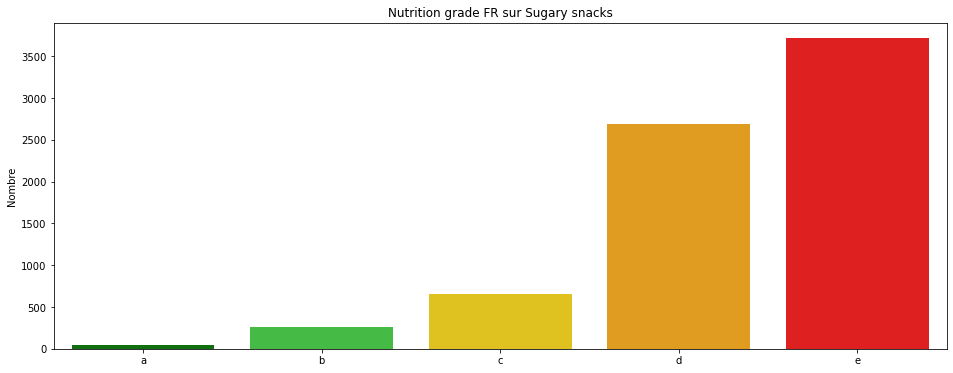

In [88]:
# Graphique Sugary snacks nutrition grade fr
order = ['a', 'b', 'c', 'd', 'e']
colors = ['green','limegreen','gold','orange','red','grey']

plt.figure(figsize=(16, 6))
sns.countplot(x='nutrition_grade_fr', data=snack_sugary, order=order, palette=colors)
plt.title("Nutrition grade FR sur Sugary snacks")
plt.ylabel("Nombre")
plt.xlabel('')
plt.show()

### Produit catégorie ice bien noté

In [89]:
france_tot.pnns_groups_2.value_counts()

unknown                             21608
One-dish meals                       4384
Biscuits and cakes                   3342
Cereals                              2756
Cheese                               2679
Sweets                               2552
Processed meat                       2282
Dressings and sauces                 2065
Milk and yogurt                      1885
Chocolate products                   1855
Fish and seafood                     1732
Non-sugared beverages                1611
Sweetened beverages                  1526
Appetizers                           1475
Fruit juices                         1382
Vegetables                           1262
Bread                                1142
Breakfast cereals                    1046
Fruits                               1024
Fats                                  934
Meat                                  921
Dairy desserts                        699
Sandwich                              604
Ice cream                         

In [90]:
# Recherche sur les glaces
ice = france_tot.loc[france_tot["pnns_groups_2"] == "Ice cream",:]
ice

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
54740,42272010523,Vanilla Organic Non-Dairy,"amy's,Vitalita","Lait de coco* 83 %, sucre de canne, extrait de...",NaN,1.0,[ lait-de-coco-83 -> fr:lait-de-coco-83 ] [...,0.0,0.0,d,Milk and dairy products,Ice cream,778.0,13.0,13.0,1.10,2.20,0.260,14.0
54741,422720105530,Glace au chocolat végane,Amy's Kitchen,"Lait de coco 75%, sirop d'agave, poudre de cac...",NaN,1.0,[ lait-de-coco-75 -> fr:lait-de-coco-75 ] [...,0.0,0.0,d,Milk and dairy products,Ice cream,791.0,13.0,13.0,2.10,2.10,0.240,13.0
92501,76840600021,Cookie Dough Ben & Jerry's 425 G,Ben & Jerry's,NaN,85 g,NaN,NaN,NaN,NaN,d,Milk and dairy products,Ice cream,1130.0,15.0,25.0,0.00,4.00,0.170,16.0
92502,76840600038,Chocolate Fudge Brownie Ice Cream,Ben & Jerry's,"Eau, crème (25%), sucre*, lait concentré écrém...",83 g,3.0,[ eau -> fr:eau ] [ creme -> fr:creme ] [...,0.0,0.0,d,Milk and dairy products,Ice cream,1100.0,13.0,27.0,NaN,4.20,0.180,15.0
102181,84909105677,Durian,Yaco,"Eau, sucre, durian et extrait de noix de coco",80 g,0.0,[ eau -> fr:eau ] [ sucre -> fr:sucre ] [...,0.0,0.0,unknown,Milk and dairy products,Ice cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316066,8722700218074,Rhum Raisins Carte d'Or,"Carte d'Or,Unilever,Miko","lait écrémé réhydraté, crème, eau, sucre, rais...",NaN,6.0,[ lait-ecreme-rehydrate -> fr:lait-ecreme-reh...,0.0,1.0,unknown,Milk and dairy products,Ice cream,820.0,8.0,NaN,NaN,2.50,NaN,NaN
316067,8722700219392,Sorbet fruit de la passion,"Carte d'Or,Unilever","Eau, jus de fruit de la passion à base de jus ...",NaN,3.0,[ eau -> fr:eau ] [ jus-de-fruit-de-la-pass...,0.0,0.0,c,Milk and dairy products,Ice cream,590.0,0.5,28.0,NaN,0.60,0.054,7.0
316068,8722700219651,Carte d'Or - Les Sensations - Saveur Crème Brû...,"Miko,Carte d'Or,Unilever","Lait écrémé réhydraté, sucre, crème (10%), eau...",56 g (~ 100mL),5.0,[ lait-ecreme-rehydrate -> fr:lait-ecreme-reh...,0.0,1.0,d,Milk and dairy products,Ice cream,880.0,8.0,29.0,NaN,2.50,0.084,12.0
316076,8722700235811,Magnum Pistachio,Magnum,"Lait écrémé réhydraté, sucre, sirop de glucose...",86 g,7.0,[ lait-ecreme-rehydrate -> fr:lait-ecreme-reh...,0.0,2.0,d,Milk and dairy products,Ice cream,1360.0,22.1,26.7,1.74,4.07,0.118,17.0


In [91]:
# Affichage du nombre de glace par nutrition_grade_fr
ice["nutrition_grade_fr"].value_counts()

d          255
c          161
e           74
unknown     22
b           15
a            1
Name: nutrition_grade_fr, dtype: int64

In [92]:
# Affichage de la glace sur nutrition_grade_fr == a
ice.loc[ice["nutrition_grade_fr"] == "a",:]

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
219565,3270160840298,Sorbet Le cacao,Picard,NaN,NaN,NaN,NaN,NaN,NaN,a,Milk and dairy products,Ice cream,600.0,2.1,22.3,4.96,3.6,0.08,-1.0


### Graphique

In [93]:
# Vérification avant graphique sans compter les NAN dans le calcul
(france_tot.pnns_groups_1.value_counts())/(len(france_tot)-(france_tot.pnns_groups_1.isna().sum()))

unknown                    0.336830
Sugary snacks              0.119019
Milk and dairy products    0.088946
Cereals and potatoes       0.083708
Composite foods            0.083048
Fish Meat Eggs             0.077503
Beverages                  0.076904
Fat and sauces             0.046063
Fruits and vegetables      0.045940
Salty snacks               0.029014
fruits-and-vegetables      0.007035
sugary-snacks              0.005975
cereals-and-potatoes       0.000015
Name: pnns_groups_1, dtype: float64

In [94]:
# Supprimer les unknown de nutrition_grade_fr
nutri_alpha = france_tot[france_tot["pnns_groups_1"] != "unknown"]

# Remplacement des noms avec "-"
nutri_alpha["pnns_groups_1"] = nutri_alpha["pnns_groups_1"].replace({"fruits-and-vegetables": "Fruits and vegetables", "sugary-snacks":"Sugary snacks", "cereals-and-potatoes": "Cereals and potatoes"})

# Labels
labels = nutri_alpha.pnns_groups_1.unique()

# Compte plus classement nutrition_grade_fr
nutri_alpha = nutri_alpha.pnns_groups_1.value_counts().sort_index()
nutri_alpha

Beverages                  5007
Cereals and potatoes       5451
Composite foods            5407
Fat and sauces             2999
Fish Meat Eggs             5046
Fruits and vegetables      3449
Milk and dairy products    5791
Salty snacks               1889
Sugary snacks              8138
Name: pnns_groups_1, dtype: int64

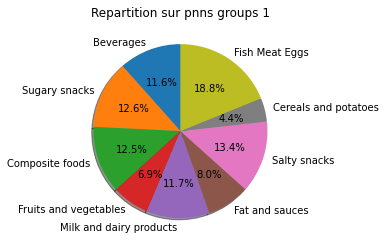

In [95]:
# Graphique
plt.figure(figsize=(13,4)) 
plt.subplot(1,2,1)
#labels = nutri_alpha.pnns_groups_1.unique()
#colors = ['green','limegreen','gold','orange','red']
plt.title("Repartition sur pnns groups 1")
plt.pie(nutri_alpha, shadow=True, labels=labels, autopct='%1.1f%%', startangle = 90) # labels=labels, colors=colors,
plt.show()

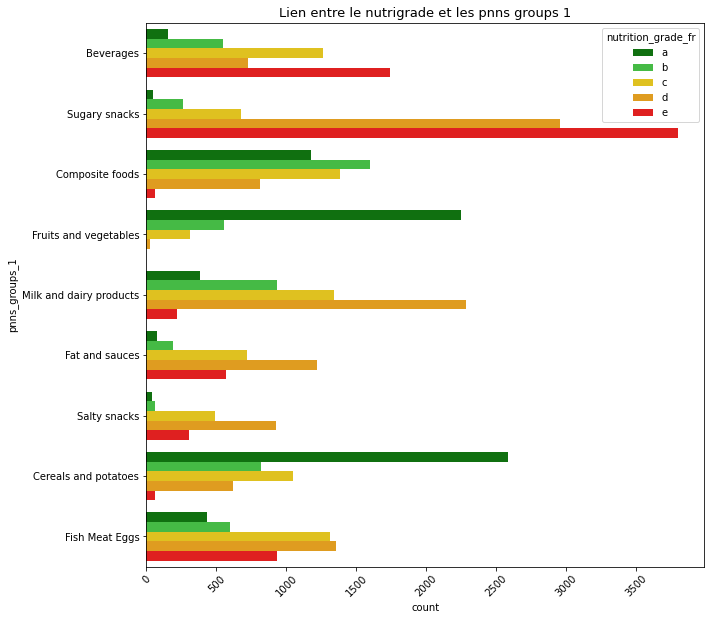

In [96]:
# Création DF pnns_groups_1 sans unknown
france_no_pnns1_unk = france_tot.loc[france_tot["pnns_groups_1"] != "unknown"]

# Remplacement des noms avec "-"
france_no_pnns1_unk["pnns_groups_1"] = france_no_pnns1_unk["pnns_groups_1"].replace({"fruits-and-vegetables": "Fruits and vegetables", "sugary-snacks":"Sugary snacks", "cereals-and-potatoes": "Cereals and potatoes"})

# nutrition_grade_fr en ordre croissant 
hue_order = ["a", "b", "c", "d", "e"]

# couleur
couleur = {"a":"green", "b":"limegreen", "c":"gold", "d":"orange", "e":"red"}

# Graphique
plt.figure(figsize=(10, 10))
plt.title("Lien entre le nutrigrade et les pnns groups 1", fontsize=13)
sns.countplot(y='pnns_groups_1', hue='nutrition_grade_fr', data=france_no_pnns1_unk, hue_order=hue_order, palette=couleur)
plt.xticks(rotation=45)
plt.show()

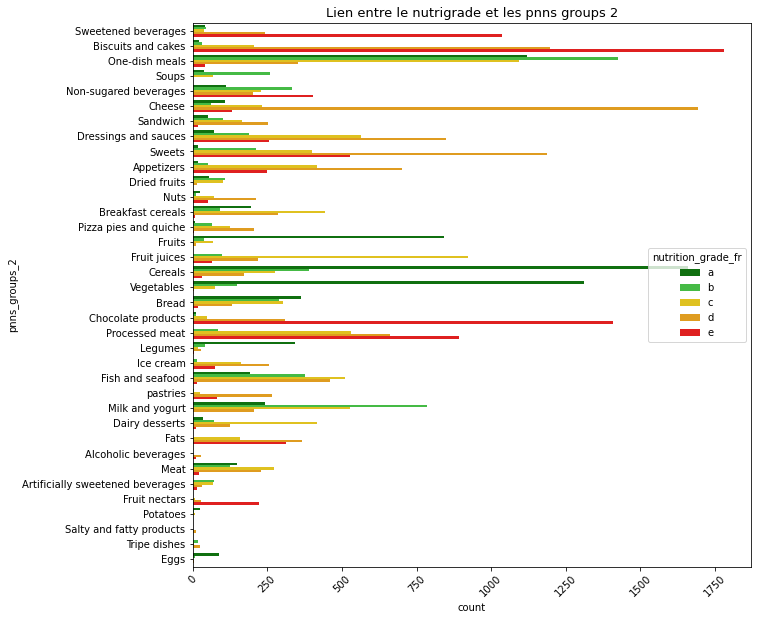

In [97]:
# Création DF pnns_groups_2 sans unknown
france_no_pnns2_unk = france_tot.loc[france_tot["pnns_groups_2"] != "unknown"]

# Remplacement des noms minuscule deja present en Maj
france_no_pnns2_unk["pnns_groups_2"] = france_no_pnns2_unk["pnns_groups_2"].replace({"cereals": "Cereals", "fruits":"Fruits", "vegetables": "Vegetables"})

# nutrition_grade_fr en ordre croissant 
hue_order = ["a", "b", "c", "d", "e"]

# couleur
couleur = {"a":"green", "b":"limegreen", "c":"gold", "d":"orange", "e":"red"}

# Graphique
plt.figure(figsize=(10, 10))
plt.title("Lien entre le nutrigrade et les pnns groups 2", fontsize=13)
sns.countplot(y='pnns_groups_2', hue='nutrition_grade_fr', data=france_no_pnns2_unk, hue_order=hue_order, palette=couleur)
plt.xticks(rotation=45)
plt.show()

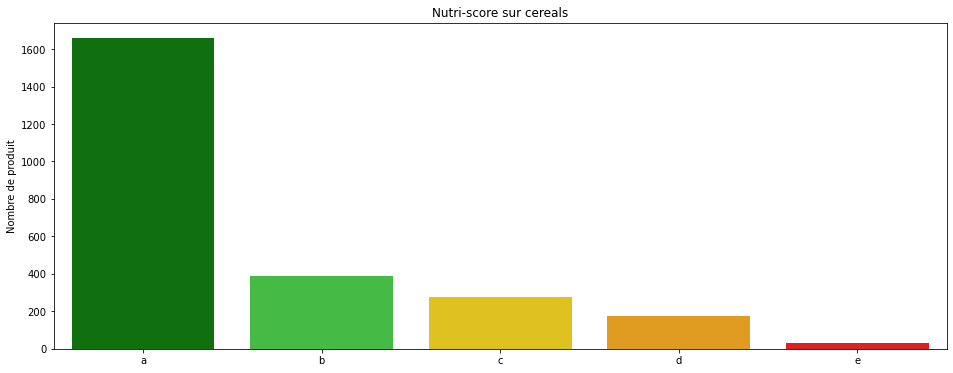

In [98]:
# DataFrame du groupe cereals
cereals = france_no_pnns2_unk.loc[france_no_pnns2_unk["pnns_groups_2"] == "Cereals"]

# Graphique chocolate_products nutrition grade fr
order = ['a', 'b', 'c', 'd', 'e']
colors = ['green','limegreen','gold','orange','red','grey']

plt.figure(figsize=(16, 6))
sns.countplot(x='nutrition_grade_fr', data=cereals, order=order, palette=colors)
plt.title("Nutri-score sur cereals")
plt.ylabel("Nombre de produit")
plt.xlabel('')
plt.show()

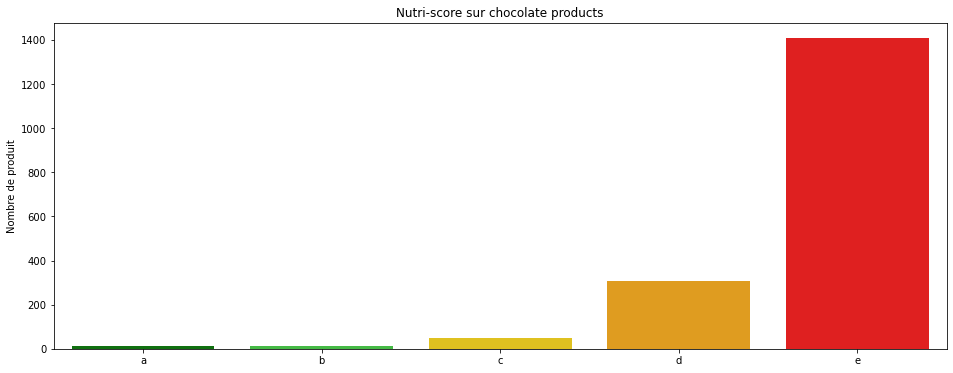

In [99]:
# DataFrame du groupe chocolate_products
chocolate_products = france_no_pnns2_unk.loc[france_no_pnns2_unk["pnns_groups_2"] == "Chocolate products"]

# Graphique chocolate_products nutrition grade fr
order = ['a', 'b', 'c', 'd', 'e']
colors = ['green','limegreen','gold','orange','red','grey']

plt.figure(figsize=(16, 6))
sns.countplot(x='nutrition_grade_fr', data=chocolate_products, order=order, palette=colors)
plt.title("Nutri-score sur chocolate products")
plt.ylabel("Nombre de produit")
plt.xlabel('')
plt.show()

In [100]:
# Skewness test (test de normalité) 0.26 légere asymétrie 14.77 forte asymétrie
for column in list_column:
    a = france_tot_imputer1[column].skew()
    print(f"{column}:     {a}")

energy_100g:     0.5316072194586495
fat_100g:     1.9966967938001998
sugars_100g:     1.9207180634438783
fiber_100g:     8.23643710121055
proteins_100g:     2.298620471087422
salt_100g:     15.994513845048251


# ACP: analyse en composantes principales
### Echantillion de 5000 rows

In [101]:
# Rappel
list_column

['energy_100g',
 'fat_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g']

In [102]:
# Mise en place des valeurs imputées dans le DF avant imputation
france_tot_imputer[list_column] = france_tot_imputer1

In [103]:
# suppression des unknown sur la variable nutrition_grade_fr
france_tot_imputer = france_tot_imputer.loc[france_tot_imputer["nutrition_grade_fr"] != "unknown"]
france_tot_imputer

,code,product_name,brands,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
106,36252,Lion Peanut x2,Sunridge,"Milk chocolate coating (evaporated cane juice,...",40 g (0.25 cup),1.0,[ milk-chocolate-coating -> en:milk-chocolate...,0.0,0.0,e,unknown,unknown,1883.0,20.000000,57.50,2.5,2.50,0.09652,22.0
190,10187319,Mini Confettis,Alice Délice,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,1753.0,5.482416,87.70,0.9,0.60,0.01000,14.0
191,10207260,Praliné Amande Et Noisette,Alice Délice,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,2406.0,26.498484,50.30,3.9,9.50,0.00300,14.0
226,40608754,"Pepsi, Nouveau goût !",Pepsi,"Eau gazéifiée, sucre, colorant caramel E150d, ...",150ml,2.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,0.0,0.0,e,Beverages,Sweetened beverages,177.0,0.000000,10.40,0.0,0.00,0.02540,13.0
234,69161025,Tarte Poireaux Et Lardons,Bo Frost,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,1079.0,18.139933,1.00,1.4,7.50,0.80000,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,9782211109758,Verrine Cheescake Myrtille,Kayser,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,1084.0,16.132493,10.50,0.0,8.70,0.29000,16.0
320741,9782401029101,Fiche Brevet,Hatier,NaN,NaN,NaN,NaN,NaN,NaN,b,unknown,unknown,4.0,0.000000,1.00,10.0,10.00,10.00000,0.0
320751,9847548283004,Tartines craquantes bio au sarrasin,Le Pain des fleurs,NaN,NaN,NaN,NaN,NaN,NaN,a,Cereals and potatoes,Bread,1643.0,2.800000,2.60,5.9,13.00,0.68000,-4.0
320757,9900000000233,Amandes,Biosic,NaN,NaN,NaN,NaN,NaN,NaN,b,unknown,unknown,2406.0,30.783125,3.89,12.2,21.22,0.10000,0.0


In [104]:
# Echantillion de 5000
france_tot_imput_5k = france_tot_imputer.sample(n=5000, random_state = 30)

In [105]:
# Dataframe des varables 100g de l'echantillion 5000
france_tot_imput_5k_100 = france_tot_imput_5k[list_column]
france_tot_imput_5k_100

,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
279814,84.0,0.000000,4.6,0.100000,0.0,2.000000e-02
214643,920.0,13.588155,0.0,0.000000,19.0,9.000000e-01
209467,393.0,4.940367,0.6,0.900000,5.1,5.400000e-01
233850,1975.0,34.464545,1.5,4.000000,6.6,8.000000e-01
221356,1431.0,17.599947,27.9,1.200000,4.0,1.800000e-01
...,...,...,...,...,...,...
228646,1786.0,38.000000,15.0,0.833889,2.0,4.500000e-01
252847,163.0,0.000000,0.0,80.150000,7.8,0.000000e+00
209158,179.0,0.000000,9.6,0.500000,0.5,0.000000e+00
238070,310.0,1.500000,1.5,1.800000,6.4,7.400000e-01


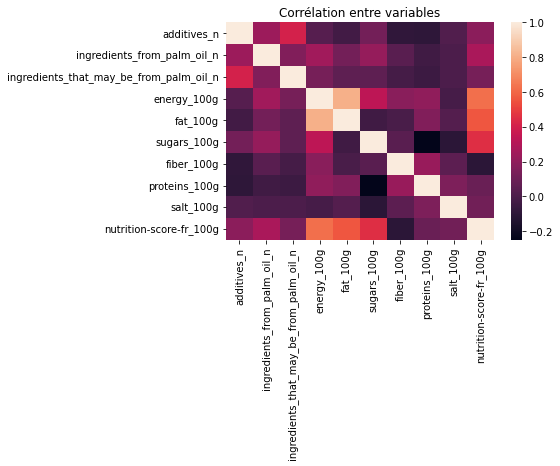

In [106]:
# Corrélation entre variables
sns.heatmap(france_tot_imput_5k.corr())
plt.title("Corrélation entre variables")
plt.show()

In [107]:
# Transformer les données en array numpy
X = france_tot_imput_5k_100.values

In [108]:
# Enregistrement pour "labels" sur graphique (=4)
index = france_tot_imput_5k_100.index

In [109]:
# Enregistrement des noms de colonnes
features = france_tot_imput_5k_100.columns
features

Index(['energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g'],
      dtype='object')

In [110]:
from sklearn.preprocessing import StandardScaler
# Instanciation
scaler = StandardScaler()
# Transformation – centrage-réduction
X_scaled = scaler.fit_transform(X)

In [111]:
# Vérification moyenne à 0 et un écart type à 1 
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5
mean,0.0,0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


In [112]:
from sklearn.decomposition import PCA
# Travail sur les 4 premieres composantes
n_components = 4
# On instancie notre ACP
pca = PCA(n_components=4)
# Entrainement des données scalées
pca.fit(X_scaled)

PCA(n_components=4)

In [113]:
# Variance captée par chaque composante (% de chaque)
print(pca.explained_variance_ratio_)
# Total des 4 composantes (%)
print(pca.explained_variance_ratio_.sum())

[0.32335566 0.23237428 0.17500409 0.15208579]
0.882819822345882


In [114]:
# Variance
evr = pca.explained_variance_ratio_
df_evr = pd.DataFrame (evr, columns =['Variance'])
df_evr.reset_index(inplace = True)
df_evr

,index,Variance
0,0,0.323356
1,1,0.232374
2,2,0.175004
3,3,0.152086


In [115]:
# Enregistrement dans variable "scree" et "scree_cum"
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
# Variable: liste de composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

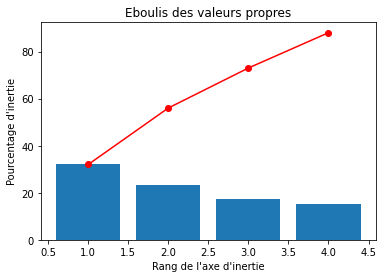

In [116]:
# Vue graphique Eboulis des valeurs propres Bleu: variance de chaque composante    Rouge: variance cumulée    dont + de 90% en 5 composantes
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig("Eboulis.png")
plt.show()

#On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.
#On voit ici que près de 80% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières.

In [117]:
# Formule de calcul donnée par l'attribut components_
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,0.687245,0.627608,0.151709,0.197264,0.265708,0.035672
1,-0.167341,-0.025407,-0.608820,0.252519,0.595685,0.426712
2,-0.012333,-0.385908,0.432533,0.808015,0.100497,-0.029147
3,0.037509,-0.032586,0.337508,-0.134060,-0.234111,0.900466


In [118]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
F1,0.69,0.63,0.15,0.20,0.27,0.04
F2,-0.17,-0.03,-0.61,0.25,0.60,0.43
F3,-0.01,-0.39,0.43,0.81,0.10,-0.03
F4,0.04,-0.03,0.34,-0.13,-0.23,0.90


In [119]:
# affichage en pivot
pcs.T

,F1,F2,F3,F4
energy_100g,0.687245,-0.167341,-0.012333,0.037509
fat_100g,0.627608,-0.025407,-0.385908,-0.032586
sugars_100g,0.151709,-0.608820,0.432533,0.337508
fiber_100g,0.197264,0.252519,0.808015,-0.134060
proteins_100g,0.265708,0.595685,0.100497,-0.234111
salt_100g,0.035672,0.426712,-0.029147,0.900466


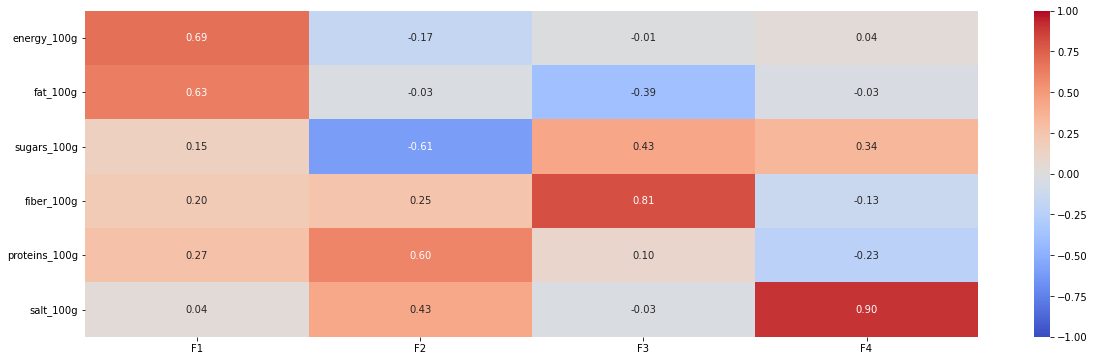

In [120]:
# Matrice de corrélation                              fmt = nb de chiffre apres la virgule
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig("Matrice.png")
plt.show()

In [121]:
# Fonction Correlation
def correlation_graph(pca, 
                      x_y, 
                      features) : 

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(7, 7))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.01,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an)) 

    # Axes et display
    plt.axis('equal')
    plt.savefig("CercleCorr.png")
    plt.show()

In [122]:
# Fonction Projection
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[7, 7], 
                                marker="."):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,7)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
    
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.savefig("Projection.png")
    plt.show()

In [123]:
# Calcule des coordonnées des individus dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.93091207, -0.31973437, -0.3932339 , -0.14815229],
       [-0.03111138,  1.16639166, -0.61840902, -0.55998288],
       [-1.2766907 ,  0.22548525, -0.40200198, -0.25871344],
       [ 1.50246438,  0.12263239, -0.54750574, -0.29748499],
       [ 0.3401383 , -0.98900811, -0.07293831,  0.17532641]])

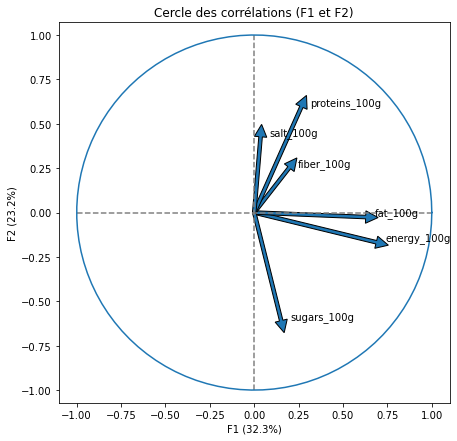

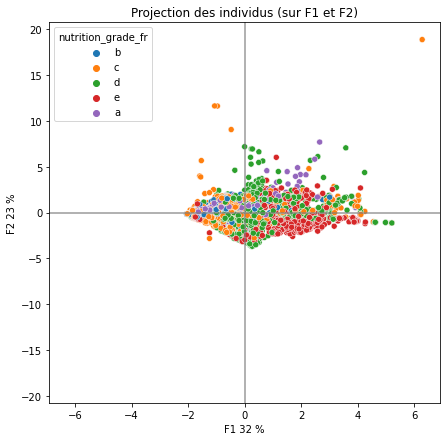

In [124]:
# Graphique F1 F2
correlation_graph(pca, (0,1), features) 
display_factorial_planes(X_proj, (0,1), pca, clusters=france_tot_imput_5k['nutrition_grade_fr'], marker="o") #

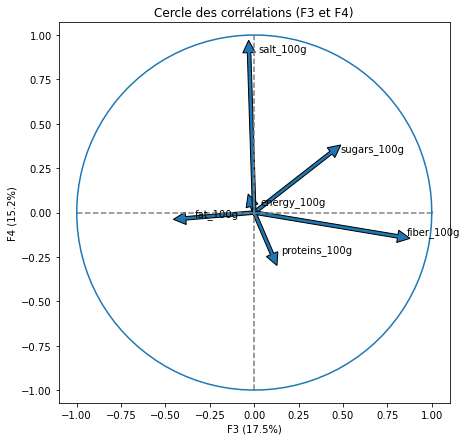

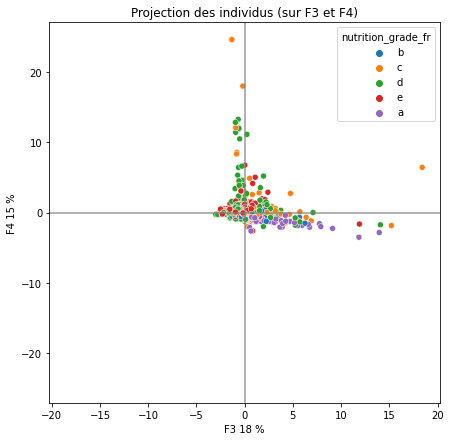

In [125]:
# Graphique F3 F4
correlation_graph(pca, (2,3), features)
display_factorial_planes(X_proj, (2,3), pca, clusters=france_tot_imput_5k['nutrition_grade_fr'], marker="o") #, labels=index

In [126]:
# Fin ACP

### Kruskal-Wallis

In [127]:
from scipy import stats

In [128]:
# Suppression des null
france_clean = france_tot_imputer.dropna()

In [129]:
# Récuperation des valeurs de la variable energy_100g par note nutriscore
nutri_a = france_clean.loc[france_clean["nutrition_grade_fr"] == "a", "energy_100g"].values
nutri_b = france_clean.loc[france_clean["nutrition_grade_fr"] == "b", "energy_100g"].values
nutri_c = france_clean.loc[france_clean["nutrition_grade_fr"] == "c", "energy_100g"].values
nutri_d = france_clean.loc[france_clean["nutrition_grade_fr"] == "d", "energy_100g"].values
nutri_e = france_clean.loc[france_clean["nutrition_grade_fr"] == "e", "energy_100g"].values

# assemblage
nutri_abcde = [nutri_a, nutri_b, nutri_c, nutri_d, nutri_e]

# Kruskal-Wallis sur energy_100g
krus = stats.kruskal(*nutri_abcde)
krus

KruskalResult(statistic=6645.561462321904, pvalue=0.0)

In [130]:
# Récuperation des valeurs de la variable fiber_100g par note nutriscore
nutri_a = france_clean.loc[france_clean["nutrition_grade_fr"] == "a", "fiber_100g"].values
nutri_b = france_clean.loc[france_clean["nutrition_grade_fr"] == "b", "fiber_100g"].values
nutri_c = france_clean.loc[france_clean["nutrition_grade_fr"] == "c", "fiber_100g"].values
nutri_d = france_clean.loc[france_clean["nutrition_grade_fr"] == "d", "fiber_100g"].values
nutri_e = france_clean.loc[france_clean["nutrition_grade_fr"] == "e", "fiber_100g"].values

# assemblage
nutri_abcde = [nutri_a, nutri_b, nutri_c, nutri_d, nutri_e]

# Kruskal-Wallis sur fiber_100g
krus = stats.kruskal(*nutri_abcde)
krus

KruskalResult(statistic=945.9474094454555, pvalue=1.844523539468639e-203)

### Fonction d'autocomplétion

In [131]:
import ipywidgets as widgets #!pip install ipywidgets
from IPython.display import display

# Tuple des produits
products_list = tuple(france_tot_imputer.product_name)

# Fonction pour l'autocomplétion
def autocomplete_product_name(products_list):
    combo = widgets.Combobox(
        #value='Mini Confettis',
        placeholder='Choisir le produit',
        options=products_list,
        description='Nom produit:',
        ensure_option=True # obligation de selection
    )
    
    return combo

In [132]:
# Appel de la fonction autocomplete_product_name
product_click = autocomplete_product_name(products_list)
display(product_click)

Combobox(value='', description='Nom produit:', ensure_option=True, options=('Lion Peanut x2', 'Mini Confettis'…

### RGPD

Les 5 grands principes des règles de protection des données personnelles sont les suivants :


- Le principe de finalité : le responsable d'un fichier ne peut enregistrer et utiliser des informations sur des personnes physiques que dans un but bien précis, légal et légitime ;

- Le principe de proportionnalité et de pertinence : les informations enregistrées doivent être pertinentes et strictement nécessaires au regard de la finalité du fichier ;

- Le principe d'une durée de conservation limitée : il n'est pas possible de conserver des informations sur des personnes physiques dans un fichier pour une durée indéfinie. Une durée de conservation précise doit être fixée, en fonction du type d'information enregistrée et de la finalité du fichier ;

- Le principe de sécurité et de confidentialité : le responsable du fichier doit garantir la sécurité et la confidentialité des informations qu'il détient. Il doit en particulier veiller à ce que seules les personnes autorisées aient accès à ces informations ;

- Les droits des personnes 